# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display
from matplotlib.ticker import FuncFormatter

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

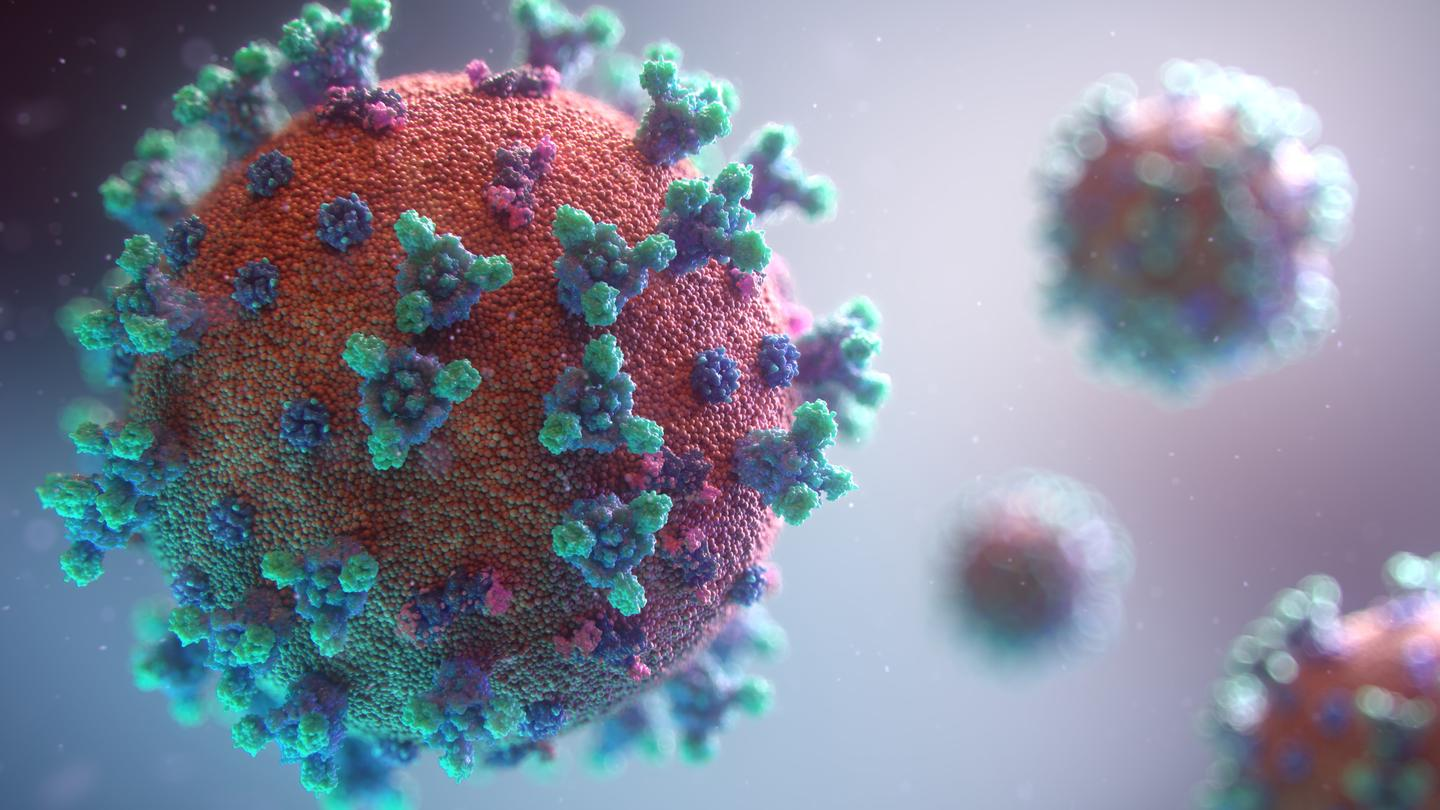

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(222835, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222835 entries, 0 to 222834
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    222835 non-null  object 
 1   continent                                   210032 non-null  object 
 2   location                                    222835 non-null  object 
 3   date                                        222835 non-null  object 
 4   total_cases                                 213687 non-null  float64
 5   new_cases                                   213398 non-null  float64
 6   new_cases_smoothed                          212202 non-null  float64
 7   total_deaths                                194543 non-null  float64
 8   new_deaths                                  194470 non-null  float64
 9   new_deaths_smoothed                         193290 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         1014
MEX         1014
THA         1011
TWN          999
MAC          993
OWID_WRL     993
OWID_UMC     993
KOR          993
CHN          993
USA          993
Name: iso_code, dtype: int64

# Helper Functions

In [10]:
# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)




def cntplot(data: pd.DataFrame, orient: str, palette: str|list|dict, dodge: bool, x=None, y=None, hue=None, order=None, hue_order=None, color=None, ax=None):
  '''
  
  Helper function for plotting countplots

  Parameters
  ----------

  data: pd.DataFrame
        pandas dataframe

  orient: str
        orientation of the plot
  
  palette: palette name, list or dict
        colors to use for different levels

  dodge: bool
        whether elements should be shifted along the categorial axis

  x,y,hue: None
        inputs for plotting long-form data

  Returns: ax
        Returns the axes object with the plot drawn
        
  '''

  return sns.countplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, orient=orient, color=color, palette=palette, dodge=dodge, ax=ax)



def plot_pie(shadow: bool, startangle: float, normalize: bool, x=None, labels=None, explode=None, autopct=None, data=None):
      '''
      Helper function for plotting pie charts

      Parameters
      ----------

      data: pd.DataFrame
           pandas dataframe

      x: None
           array like
      
      explode: None
            fraction of radius to offset each wedge
      
      autopct: None
            string function to label chart

      shadow: True
            draw shadow beneath the pie
      
      normalize: bool
            when true, makes a full pie 

      startangle: float
            angle by which the start of the pie is rotated
            

      Returns: pie chart
      
      '''

      return plt.pie(x=x, explode=explode, labels=labels, autopct=autopct, shadow=shadow, startangle=startangle, normalize=normalize, data=data)


In [11]:
df['continent'].value_counts()                                                                            

Africa           51463
Europe           48151
Asia             47957
North America    34238
Oceania          15859
South America    12364
Name: continent, dtype: int64

[Text(0.5, 1.0, 'Countplot of Continents')]

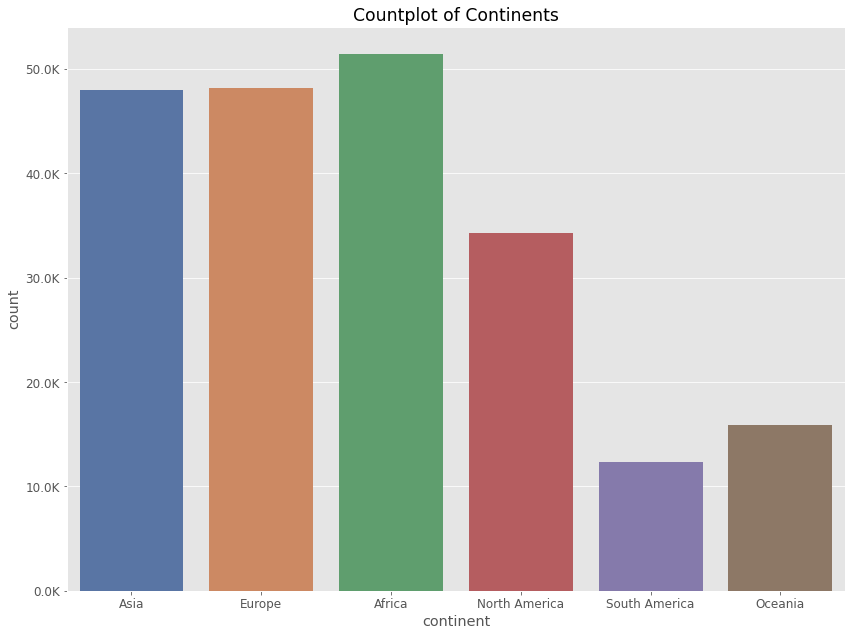

In [12]:
fig, ax = plt.subplots()

cntplot(data=df, x='continent', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))
ax.set(title='Countplot of Continents')

In [13]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.245
Europe           0.229
Asia             0.228
North America    0.163
Oceania          0.076
South America    0.059
Name: continent, dtype: float64

[Text(0.5, 1.0, 'Pie chart of the relative frequency for each continent')]

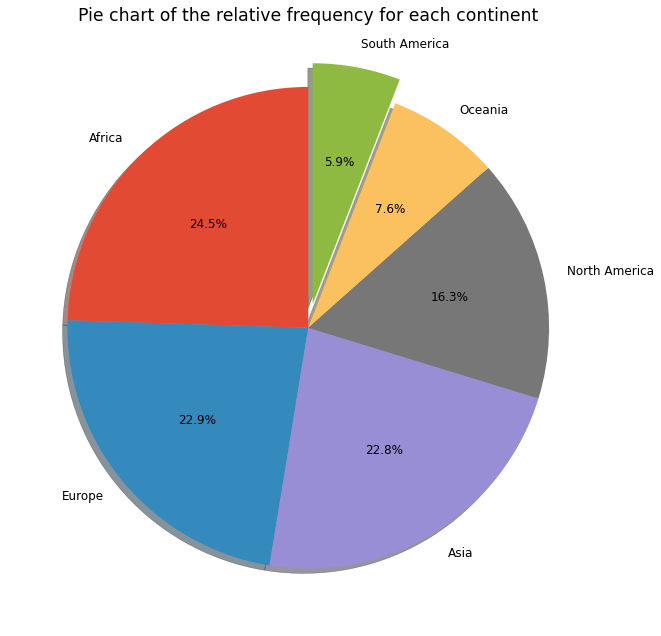

In [14]:
fig, ax = plt.subplots()

plot_pie(
  x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0, 0, 0, 0, 0.1]
)

ax.set(title='Pie chart of the relative frequency for each continent')

In [15]:
df['location'].value_counts().head(10)

Argentina              1014
Mexico                 1014
Thailand               1011
Taiwan                  999
Macao                   993
World                   993
Upper middle income     993
South Korea             993
China                   993
United States           993
Name: location, dtype: int64

In [16]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    222835    210032     222835      222835           106788
unique      244         6        244        1014                4
top         ARG    Africa  Argentina  2021-09-19  tests performed
freq       1014     51463       1014         243            80099

In [17]:
df['tests_units'].value_counts()

tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: tests_units, dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

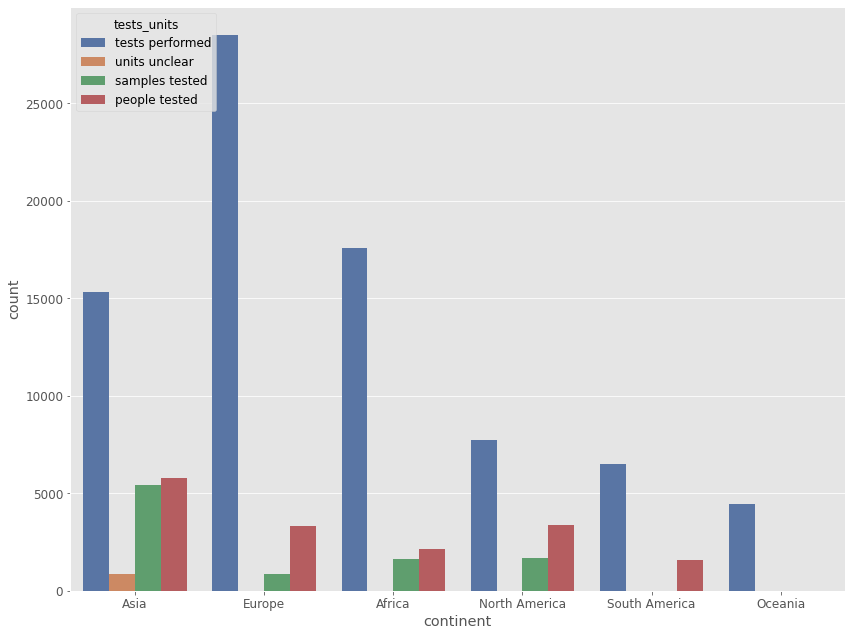

In [18]:
cntplot(data=df, orient='v', palette='deep', dodge=True, x='continent', hue='tests_units')

In [19]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13687e+05  2.13398e+05         2.12202e+05   1.94543e+05   
mean   4.33374e+06  1.24250e+04         1.24649e+04   7.32602e+04   
std    2.71290e+07  8.56870e+04         8.37677e+04   3.77148e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.16150e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76080e+04  5.60000e+01         9.60000e+01   1.15200e+03   
75%    5.13434e+05  9.70000e+02         1.13611e+03   9.67500e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194470.00000         193290.00000             212710.00000   
mean      140.03862            140.77192              58512.68778   
std       735.12701            720.70308             104239.97856   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1047.98400   
50%         1.00000              1.57100               9923.32450   
75%        14.00000             16.00000              70418.35000   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212421.00000                    211230.00000   
mean               189.90567                       190.14554   
std               1054.18583                       668.41912   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.81800                        19.62700   
75%                 98.41300                       136.26600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193579.00000            193506.00000   
mean                  682.49494                 1.41968   
std                   968.70085                 5.12226   
min                     0.00000                 0.00000   
25%                    28.93200                 0.00000   
50%                   207.19000                 0.03500   
75%                  1011.81300                 0.98900   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192331.00000       166717.00000   28278.00000   
mean                           1.41956            0.94681     829.18803   
std                            3.35470            0.38405    2468.86127   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35500            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28278.00000    31035.00000                31035.00000   
mean                   20.88085     4153.39149                  156.15891   
std                    26.18054    10770.61351                  191.28561   
min                     0.00000        0.00000                    0.00000   
25%                     3.77250      173.00000                   32.86500   
50%                    10.39200      811.00000                   87.81200   
75%                    28.95275     3172.50000                  198.67150   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7339.00000                         7339.00000   
mean               421.33356                           12.98437   
std                580.34644                           15.08146   
min             

In [20]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
222830 2022-10-06
222831 2022-10-07
222832 2022-10-08
222833 2022-10-09
222834 2022-10-10

[222835 rows x 1 columns]

In [21]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
222830  2022         10    6   Thursday
222831  2022         10    7     Friday
222832  2022         10    8   Saturday
222833  2022         10    9     Sunday
222834  2022         10   10     Monday

[222835 rows x 4 columns]

In [22]:
# assign month names
df['month_name'] = df['month_num'].map(
                                       {
                                         1: 'Jan',
                                         2: 'Feb',
                                         3: 'Mar',
                                         4: 'Apr',
                                         5: 'May',
                                         6: 'June',
                                         7: 'July',
                                         8: 'Aug',
                                         9: 'Sep',
                                         10: 'Oct',
                                         11: 'Nov',
                                         12: 'Dec'
                                       }
                                    )

df[['month_num', 'month_name']].value_counts(ascending=False)

month_num  month_name
7          July          21774
5          May           21719
8          Aug           21718
6          June          21091
9          Sep           20984
4          Apr           20770
3          Mar           19631
10         Oct           16822
1          Jan           14919
2          Feb           14764
12         Dec           14543
11         Nov           14100
dtype: int64

<AxesSubplot:xlabel='month_name', ylabel='count'>

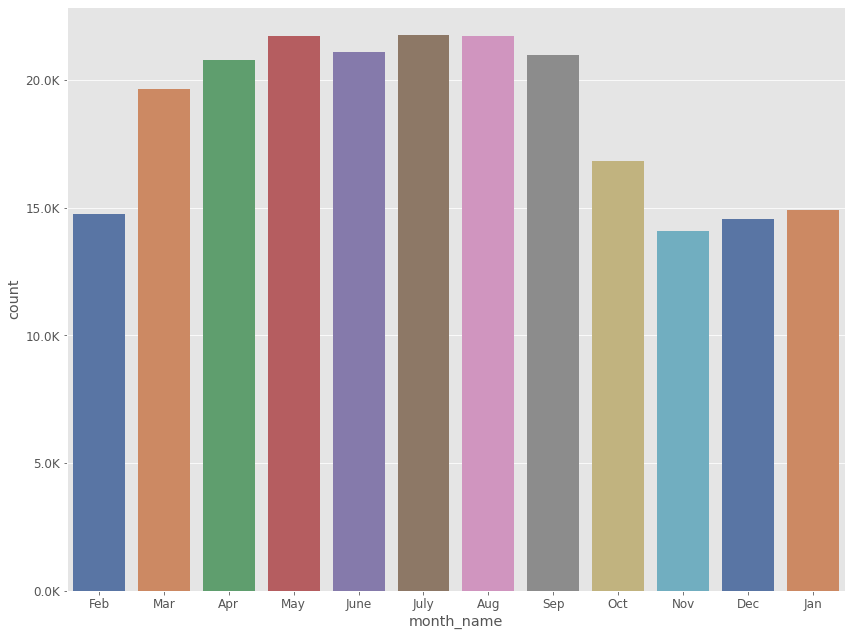

In [23]:
fig, ax = plt.subplots()

cntplot(data=df, x='month_name', palette='deep', orient='v', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))

In [24]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

# Missing Data Exploration

In [25]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      12803
location                                           0
date                                               0
total_cases                                     9148
new_cases                                       9437
new_cases_smoothed                             10633
total_deaths                                   28292
new_deaths                                     28365
new_deaths_smoothed                            29545
total_cases_per_million                        10125
new_cases_per_million                          10414
new_cases_smoothed_per_million                 11605
total_deaths_per_million                       29256
new_deaths_per_million                         29329
new_deaths_smoothed_per_million                30504
reproduction_rate                              56118
icu_patients                                  194557
icu_patients_per_million                      

<AxesSubplot:>

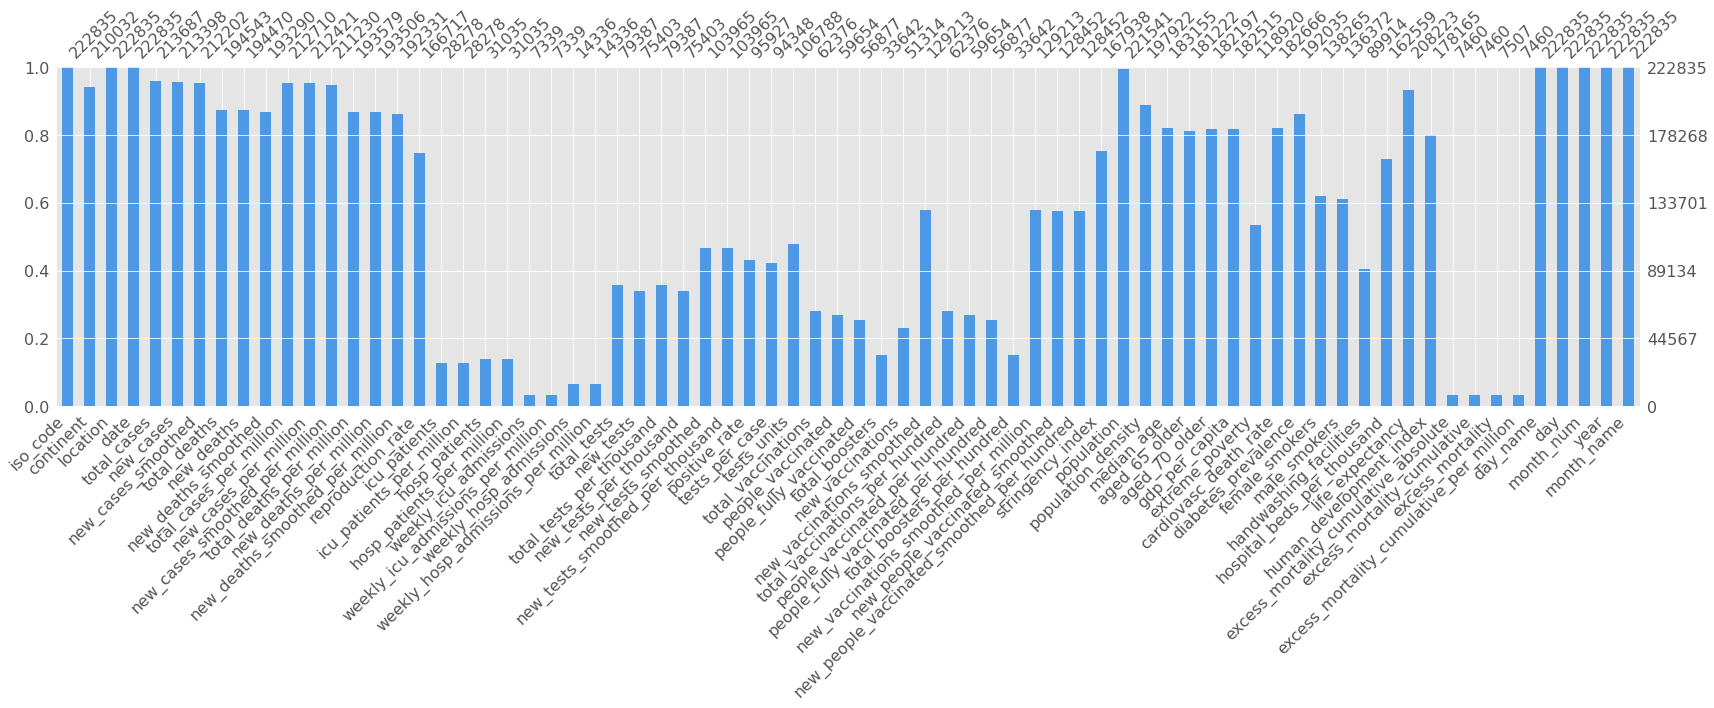

In [26]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

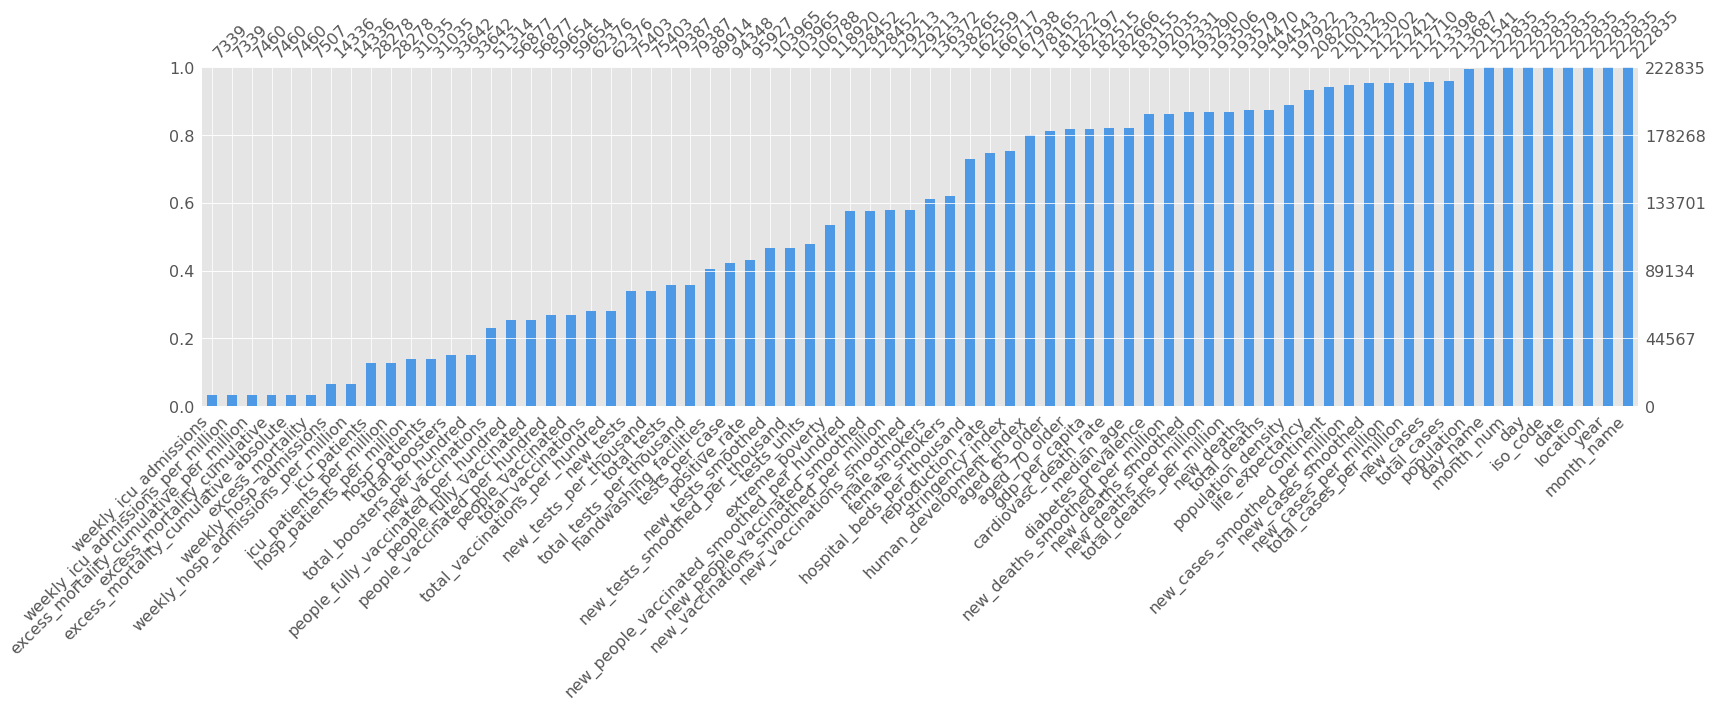

In [27]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [28]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
222830      ZWE    Africa     Zimbabwe 2022-10-06     257655.0       87.0   
222831      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   
222832      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   
222833      ZWE    Africa     Zimbabwe 2022-10-09     257655.0        0.0   
222834      ZWE    Africa     Zimbabwe 2022-10-10     257749.0       94.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
222830              35.143        5604.0         1.0                0.286   
222831              27.143        5604.0         0.0                0.286   
222832              27.143        5604.0         0.0                0.286   
222833              19.714        5604.0         0.0                0.286   
222834              30.143        5604.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
222830                16109.958                  5.440   
222831                16109.958                  0.000   
222832                16109.958                  0.000   
222833                16109.958                  0.000   
222834                16115.835                  5.877   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
222830                           2.197                   350.392   
222831                           1.697                   350.392   
222832                           1.697                   350.392   
222833                           1.233                   350.392   
222834                           1.885                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
222830                   0.063                            0.018   
222831                   0.000                            0.018   
222832                   0.000          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [29]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [30]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
222830      ZWE     Zimbabwe 2022-10-06   Thursday    6         10  2022   
222831      ZWE     Zimbabwe 2022-10-07     Friday    7         10  2022   
222832      ZWE     Zimbabwe 2022-10-08   Saturday    8         10  2022   
222833      ZWE     Zimbabwe 2022-10-09     Sunday    9         10  2022   
222834      ZWE     Zimbabwe 2022-10-10     Monday   10         10  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
222830        Oct  
222831        Oct  
222832        Oct  
222833        Oct  
222834        Oct  

[222835 rows x 8 columns]

Filling the missing data

In [31]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
222830      ZWE    Africa     Zimbabwe 2022-10-06     257655.0       87.0   
222831      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   
222832      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   
222833      ZWE    Africa     Zimbabwe 2022-10-09     257655.0        0.0   
222834      ZWE    Africa     Zimbabwe 2022-10-10     257749.0       94.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
222830              35.143        5604.0         1.0                0.286   
222831              27.143        5604.0         0.0                0.286   
222832              27.143        5604.0         0.0                0.286   
222833              19.714        5604.0         0.0                0.286   
222834              30.143        5604.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
222830                16109.958                  5.440   
222831                16109.958                  0.000   
222832                16109.958                  0.000   
222833                16109.958                  0.000   
222834                16115.835                  5.877   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
222830                           2.197                   350.392   
222831                           1.697                   350.392   
222832                           1.697                   350.392   
222833                           1.233                   350.392   
222834                           1.885                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
222830                   0.063                            0.018   
222831                   0.000                            0.018   
222832                   0.000          

Fill with Mean / Median of Group

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08663e+05  2.08663e+05         2.08663e+05   2.05498e+05   
mean   4.26436e+06  1.21090e+04         1.21458e+04   6.85173e+04   
std    2.74209e+07  8.62999e+04         8.42969e+04   3.67887e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.45000e+03  0.00000e+00         5.42900e+00   7.80000e+01   
50%    4.00240e+04  4.60000e+01         8.00000e+01   7.91000e+02   
75%    4.19612e+05  8.15000e+02         9.34143e+02   7.36200e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205498.00000         205498.00000             207686.00000   
mean      131.00189            131.56272              55031.10106   
std       715.89376            701.09951             100430.05677   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.01182                944.41350   
50%         0.57714              1.00000               8776.62200   
75%        11.00000             11.85700              65451.10500   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207686.00000                    207686.00000   
mean               182.18369                       181.92634   
std               1052.01546                       658.01203   
min                  0.00000                         0.00000   
25%                  0.00000                         1.24000   
50%                  6.83300                        17.35900   
75%                 89.11875                       126.40800   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204521.00000            204521.00000   
mean                  632.64035                 1.39966   
std                   927.46605                 4.96395   
min                     0.00000                 0.00000   
25%                    29.11400                 0.00000   
50%                   190.52600                 0.06900   
75%                   925.26100                 1.07900   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204521.00000       174620.00000   29907.00000   
mean                           1.39132            0.93477     759.79977   
std                            3.23991            0.37593    2510.50765   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      25.00000   
50%                            0.22200            0.96000      89.00000   
75%                            1.39000            1.13000     493.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29907.00000    31942.00000                31942.00000   
mean                   18.29558     3963.49184                  149.09034   
std                    21.80063    10744.27012                  181.56059   
min                     0.00000        0.00000                    0.00000   
25%                     4.51100      173.00000                   39.88925   
50%                     9.47200      796.36611                   85.02100   
75%                    27.50000     2902.33734                  192.30325   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10120.00000                        10120.00000   
mean               166.21842                           11.20123   
std                291.07236                            8.66864   
min             

In [33]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08663e+05  2.08663e+05         2.08663e+05   2.05498e+05   
mean   4.26362e+06  1.21021e+04         1.21182e+04   6.86074e+04   
std    2.74206e+07  8.63002e+04         8.42560e+04   3.68026e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.56300e+03  0.00000e+00         5.14300e+00   7.70000e+01   
50%    4.00140e+04  4.50000e+01         7.92860e+01   7.92000e+02   
75%    4.17714e+05  8.06000e+02         9.18714e+02   7.35500e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205498.00000         205498.00000             207686.00000   
mean      130.52071            131.05706              55229.52464   
std       715.81171            700.95041             100972.10947   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                938.87125   
50%         0.00000              0.92850               8640.84750   
75%        10.00000             11.28600              65443.58025   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207686.00000                    207686.00000   
mean               177.41189                       176.51014   
std               1049.40063                       653.40591   
min                  0.00000                         0.00000   
25%                  0.00000                         1.14600   
50%                  6.30500                        16.58700   
75%                 85.99100                       122.28225   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204521.00000            204521.00000   
mean                  638.10658                 1.27126   
std                   931.14389                 4.95235   
min                     0.00000                 0.00000   
25%                    28.62600                 0.00000   
50%                   192.66900                 0.00000   
75%                   929.21000                 0.75300   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204521.00000       174620.00000   29907.00000   
mean                           1.27777            0.92976     733.82609   
std                            3.21962            0.38008    2469.01792   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      24.00000   
50%                            0.13900            0.96000      88.00000   
75%                            1.15900            1.13000     453.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29907.00000    31942.00000                31942.00000   
mean                   17.50061     3740.77847                  142.85144   
std                    22.01229    10453.11386                  180.85857   
min                     0.00000        0.00000                    0.00000   
25%                     3.74100      172.00000                   39.37700   
50%                     9.26700      762.50000                   76.14350   
75%                    23.43700     2817.00000                  169.72600   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10120.00000                        10120.00000   
mean               132.53167                            7.05301   
std                258.35599                            3.60578   
min             

In [34]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13687e+05  2.13398e+05         2.12202e+05   1.94543e+05   
mean   4.33374e+06  1.24250e+04         1.24649e+04   7.32602e+04   
std    2.71290e+07  8.56870e+04         8.37677e+04   3.77148e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.16150e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76080e+04  5.60000e+01         9.60000e+01   1.15200e+03   
75%    5.13434e+05  9.70000e+02         1.13611e+03   9.67500e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194470.00000         193290.00000             212710.00000   
mean      140.03862            140.77192              58512.68778   
std       735.12701            720.70308             104239.97856   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1047.98400   
50%         1.00000              1.57100               9923.32450   
75%        14.00000             16.00000              70418.35000   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212421.00000                    211230.00000   
mean               189.90567                       190.14554   
std               1054.18583                       668.41912   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.81800                        19.62700   
75%                 98.41300                       136.26600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193579.00000            193506.00000   
mean                  682.49494                 1.41968   
std                   968.70085                 5.12226   
min                     0.00000                 0.00000   
25%                    28.93200                 0.00000   
50%                   207.19000                 0.03500   
75%                  1011.81300                 0.98900   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192331.00000       166717.00000   28278.00000   
mean                           1.41956            0.94681     829.18803   
std                            3.35470            0.38405    2468.86127   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35500            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28278.00000    31035.00000                31035.00000   
mean                   20.88085     4153.39149                  156.15891   
std                    26.18054    10770.61351                  191.28561   
min                     0.00000        0.00000                    0.00000   
25%                     3.77250      173.00000                   32.86500   
50%                    10.39200      811.00000                   87.81200   
75%                    28.95275     3172.50000                  198.67150   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7339.00000                         7339.00000   
mean               421.33356                           12.98437   
std                580.34644                           15.08146   
min             

Forward Fill & Back Fill within Groups

In [35]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.06356e+05  2.06356e+05         2.05200e+05   1.87247e+05   
mean   4.30792e+06  1.22391e+04         1.22749e+04   7.41443e+04   
std    2.75696e+07  8.67728e+04         8.48961e+04   3.84264e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.74600e+03  0.00000e+00         5.57100e+00   1.03000e+02   
50%    4.16170e+04  4.70000e+01         8.21430e+01   9.82000e+02   
75%    4.23226e+05  8.25000e+02         9.37143e+02   8.48100e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  187425.00000         186305.00000             205379.00000   
mean      142.45818            143.15665              55049.81364   
std       748.29645            733.68869             100682.55113   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                961.24450   
50%         1.00000              1.28600               8767.45800   
75%        12.00000             13.71400              65217.37900   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           205379.00000                    204228.00000   
mean               180.53177                       179.17016   
std               1059.58702                       660.49842   
min                  0.00000                         0.00000   
25%                  0.00000                         1.23100   
50%                  6.65100                        17.01100   
75%                 87.73950                       123.48950   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              186283.00000            186461.00000   
mean                  652.08368                 1.38812   
std                   955.68630                 5.32978   
min                     0.00000                 0.00000   
25%                    27.50850                 0.00000   
50%                   186.96000                 0.02300   
75%                   951.26250                 0.89900   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     185346.00000       161150.00000   26592.00000   
mean                           1.37977            0.93907     690.81769   
std                            3.36505            0.38868    2496.39591   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      20.00000   
50%                            0.18400            0.96000      83.00000   
75%                            1.27600            1.15000     361.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               26592.00000    28726.00000                28726.00000   
mean                   17.24515     3661.95635                  148.64744   
std                    23.08333    10771.04894                  190.82569   
min                     0.00000        0.00000                    0.00000   
25%                     2.77100      136.00000                   30.30225   
50%                     7.59500      675.00000                   83.02400   
75%                    21.89800     2467.75000                  177.82450   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6753.00000                         6753.00000   
mean                53.00370                           12.21617   
std                114.72882                           20.47683   
min             

In [36]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08663e+05  2.08533e+05         2.08533e+05   2.05498e+05   
mean   4.26029e+06  1.21060e+04         1.20778e+04   6.75594e+04   
std    2.74204e+07  8.63273e+04         8.42290e+04   3.67409e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.27500e+03  0.00000e+00         4.71400e+00   4.40000e+01   
50%    3.91620e+04  4.40000e+01         7.55710e+01   6.70000e+02   
75%    4.13367e+05  7.99000e+02         8.99286e+02   6.87500e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205439.00000         205439.00000             207686.00000   
mean      130.08578            129.85317              54439.14539   
std       715.89226            699.91356             100287.44534   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                907.13450   
50%         1.00000              0.85700               8242.80350   
75%        10.00000             10.71400              64191.93125   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207556.00000                    207556.00000   
mean               178.20968                       176.08518   
std               1049.71831                       653.73551   
min                  0.00000                         0.00000   
25%                  0.00000                         1.13900   
50%                  6.59900                        16.27300   
75%                 88.14400                       119.61300   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204521.00000            204462.00000   
mean                  595.60325                 2.93069   
std                   929.83519                13.00874   
min                     0.00000                 0.00000   
25%                    17.51100                 0.00000   
50%                   137.62700                 0.06300   
75%                   843.15700                 1.25100   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204462.00000       172951.00000   29165.00000   
mean                           1.58639            0.97877     710.84715   
std                            3.84663            0.44488    2479.62990   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      21.00000   
50%                            0.20100            0.97000      88.00000   
75%                            1.43300            1.18000     362.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29165.00000    30741.00000                30741.00000   
mean                   17.34646     3712.38379                  138.96457   
std                    22.71591    10672.86216                  186.64310   
min                     0.00000        0.00000                    0.00000   
25%                     2.73600      154.00000                   28.94800   
50%                     8.09500      727.00000                   71.10500   
75%                    22.91900     2400.00000                  165.18400   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9686.00000                         9686.00000   
mean               136.08177                           11.17240   
std                324.26407                           17.78671   
min             

In [37]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13687e+05  2.13398e+05         2.12202e+05   1.94543e+05   
mean   4.33374e+06  1.24250e+04         1.24649e+04   7.32602e+04   
std    2.71290e+07  8.56870e+04         8.37677e+04   3.77148e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.16150e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76080e+04  5.60000e+01         9.60000e+01   1.15200e+03   
75%    5.13434e+05  9.70000e+02         1.13611e+03   9.67500e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194470.00000         193290.00000             212710.00000   
mean      140.03862            140.77192              58512.68778   
std       735.12701            720.70308             104239.97856   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1047.98400   
50%         1.00000              1.57100               9923.32450   
75%        14.00000             16.00000              70418.35000   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212421.00000                    211230.00000   
mean               189.90567                       190.14554   
std               1054.18583                       668.41912   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.81800                        19.62700   
75%                 98.41300                       136.26600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193579.00000            193506.00000   
mean                  682.49494                 1.41968   
std                   968.70085                 5.12226   
min                     0.00000                 0.00000   
25%                    28.93200                 0.00000   
50%                   207.19000                 0.03500   
75%                  1011.81300                 0.98900   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192331.00000       166717.00000   28278.00000   
mean                           1.41956            0.94681     829.18803   
std                            3.35470            0.38405    2468.86127   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35500            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28278.00000    31035.00000                31035.00000   
mean                   20.88085     4153.39149                  156.15891   
std                    26.18054    10770.61351                  191.28561   
min                     0.00000        0.00000                    0.00000   
25%                     3.77250      173.00000                   32.86500   
50%                    10.39200      811.00000                   87.81200   
75%                    28.95275     3172.50000                  198.67150   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7339.00000                         7339.00000   
mean               421.33356                           12.98437   
std                580.34644                           15.08146   
min             

Combining FFill and BFill

In [38]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.15496e+05  2.15496e+05         2.15496e+05   2.15496e+05   
mean   4.12521e+06  1.17200e+04         1.16898e+04   6.44251e+04   
std    2.69925e+07  8.49485e+04         8.28844e+04   3.59066e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.30700e+03  0.00000e+00         3.57100e+00   2.60000e+01   
50%    3.44465e+04  3.60000e+01         6.70000e+01   5.06000e+02   
75%    3.81257e+05  7.34000e+02         8.34857e+02   6.12200e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  215496.00000         215496.00000             215496.00000   
mean      124.06703            123.85127              52466.41377   
std       699.47526            683.92980              98977.53681   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                674.71125   
50%         1.00000              0.71400               6782.83600   
75%         8.00000              9.57100              61200.69675   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           215496.00000                    215496.00000   
mean               173.10707                       170.01912   
std               1035.03915                       644.18338   
min                  0.00000                         0.00000   
25%                  0.00000                         0.79500   
50%                  5.42700                        13.88650   
75%                 83.19525                       111.83400   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              215496.00000            215496.00000   
mean                  565.44738                 2.96231   
std                   915.15558                12.84036   
min                     0.00000                 0.00000   
25%                    12.77775                 0.00000   
50%                   110.15600                 0.06900   
75%                   763.81800                 1.19100   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     215496.00000       215496.00000  203719.00000   
mean                           1.55347            1.08005     286.59614   
std                            3.78711            0.65099    1067.11829   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.79000       0.00000   
50%                            0.18000            1.00000      10.00000   
75%                            1.38000            1.25000     111.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              203719.00000   203719.00000               203719.00000   
mean                    7.99188     1376.83408                   44.56678   
std                    13.99233     4676.81276                   89.69747   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200      156.00000                   15.64200   
75%                     9.18900      636.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           181595.00000                       181595.00000   
mean               215.69314                           10.17057   
std                581.91381                           11.85831   
min             

In [39]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13687e+05  2.13398e+05         2.12202e+05   1.94543e+05   
mean   4.33374e+06  1.24250e+04         1.24649e+04   7.32602e+04   
std    2.71290e+07  8.56870e+04         8.37677e+04   3.77148e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.16150e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76080e+04  5.60000e+01         9.60000e+01   1.15200e+03   
75%    5.13434e+05  9.70000e+02         1.13611e+03   9.67500e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194470.00000         193290.00000             212710.00000   
mean      140.03862            140.77192              58512.68778   
std       735.12701            720.70308             104239.97856   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1047.98400   
50%         1.00000              1.57100               9923.32450   
75%        14.00000             16.00000              70418.35000   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212421.00000                    211230.00000   
mean               189.90567                       190.14554   
std               1054.18583                       668.41912   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.81800                        19.62700   
75%                 98.41300                       136.26600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193579.00000            193506.00000   
mean                  682.49494                 1.41968   
std                   968.70085                 5.12226   
min                     0.00000                 0.00000   
25%                    28.93200                 0.00000   
50%                   207.19000                 0.03500   
75%                  1011.81300                 0.98900   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192331.00000       166717.00000   28278.00000   
mean                           1.41956            0.94681     829.18803   
std                            3.35470            0.38405    2468.86127   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35500            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28278.00000    31035.00000                31035.00000   
mean                   20.88085     4153.39149                  156.15891   
std                    26.18054    10770.61351                  191.28561   
min                     0.00000        0.00000                    0.00000   
25%                     3.77250      173.00000                   32.86500   
50%                    10.39200      811.00000                   87.81200   
75%                    28.95275     3172.50000                  198.67150   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7339.00000                         7339.00000   
mean               421.33356                           12.98437   
std                580.34644                           15.08146   
min             

In [40]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby(['location']).transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           209.93793    4553.13305     8.37661              8.41808   
1           209.93793    4553.13305     8.37661              8.41808   
2           209.93793    4553.13305     8.37661              8.41808   
3           209.93793    4553.13305     8.37661              8.41808   
4           209.93793    4553.13305     8.37661              8.41808   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         5.23544                   113.546   
1                         5.23544                   113.546   
2                         5.23544                   113.546   
3                         5.23544                   113.546   
4                         5.23544                   113.546   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                 0.20896                          0.20998            1.06365   
1                 0.20896                          0.20998            1.06365   
2                 0.20896                          0.20998            1.06365   
3                 0.20896                          0.20998            1.06365   
4                 0.20896                          0.20998            1.06365   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

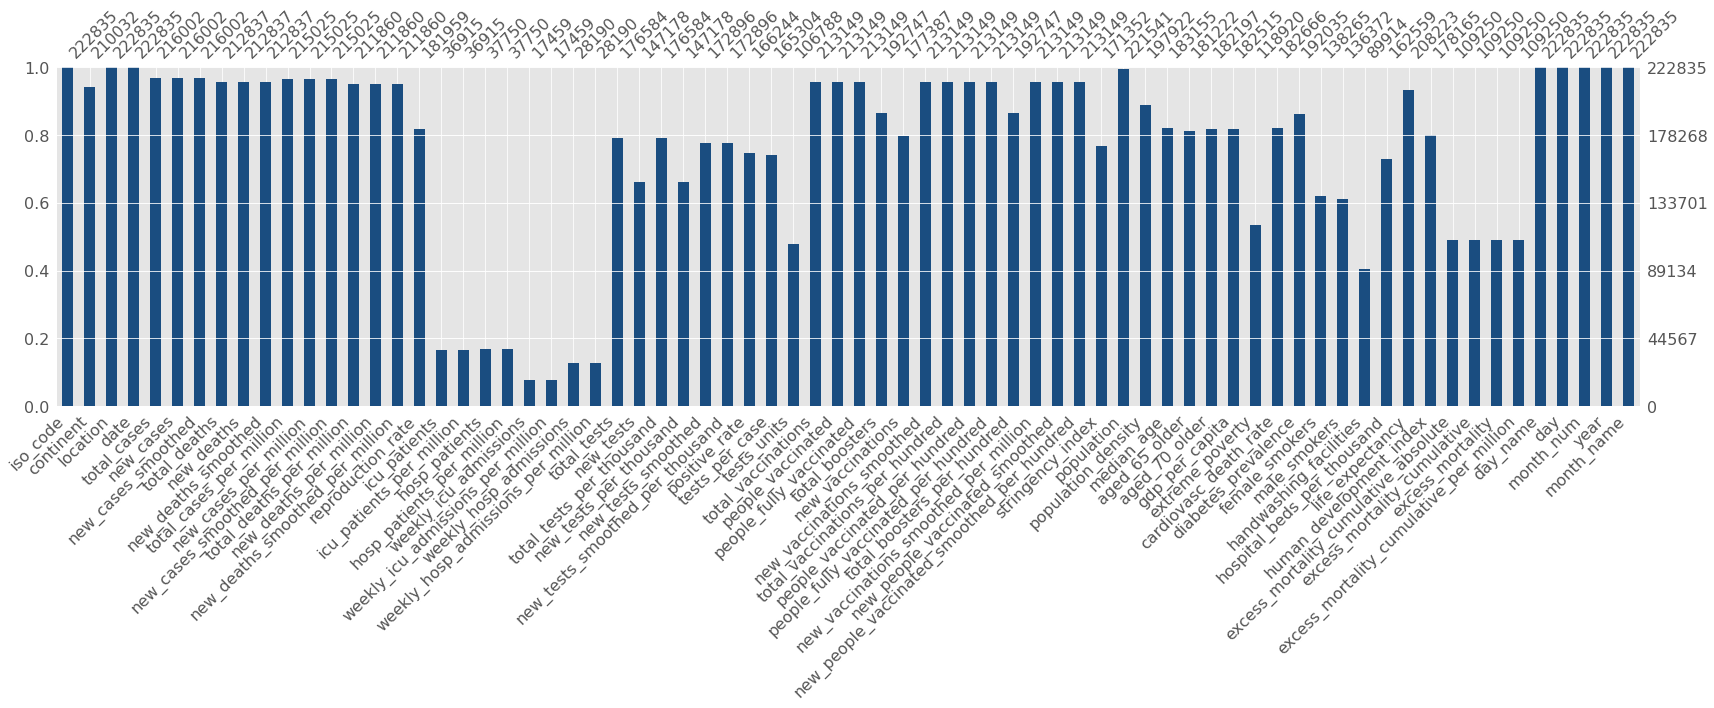

In [41]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

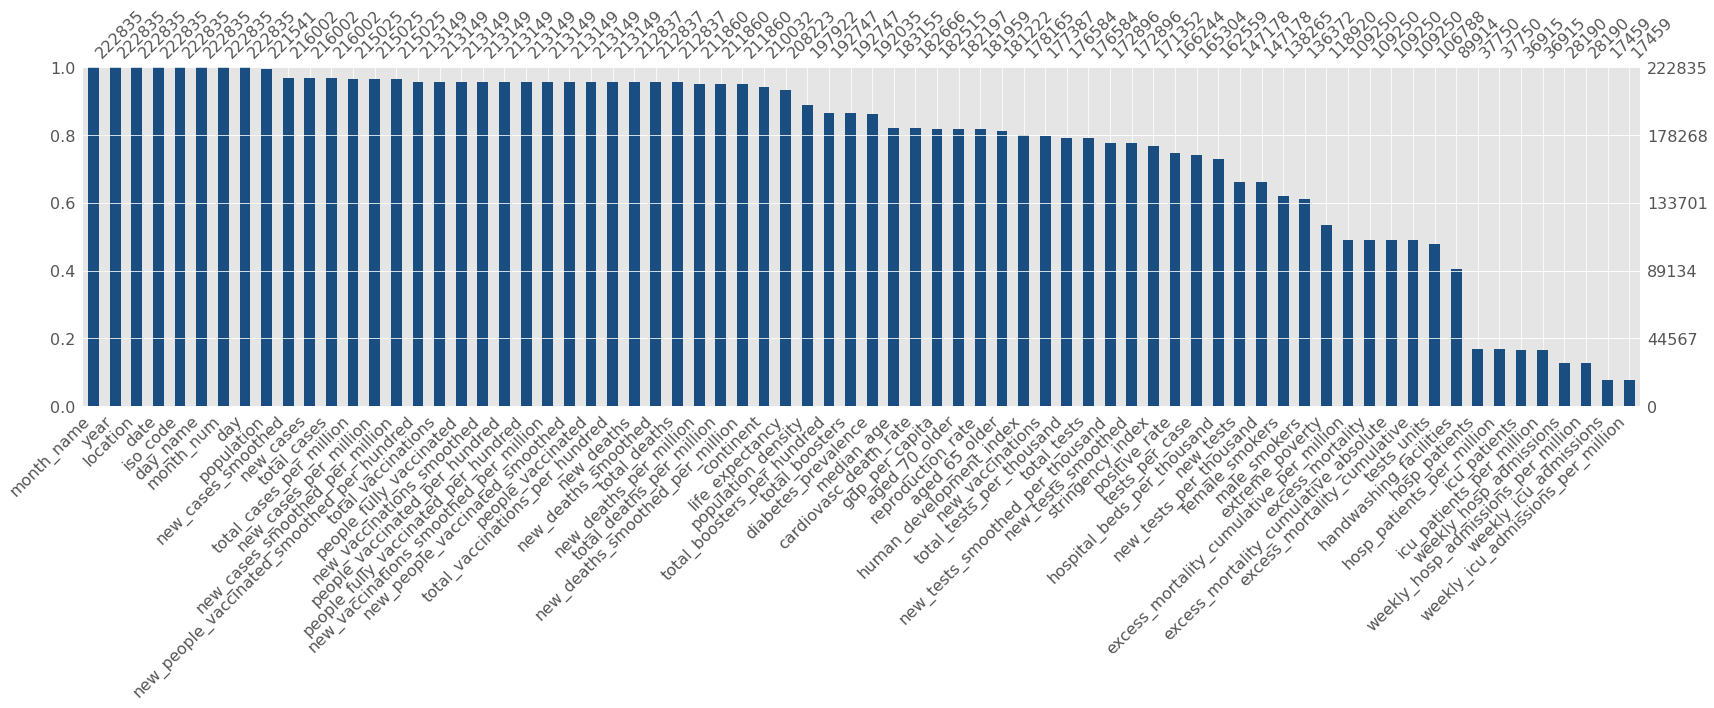

In [42]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [43]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.16002e+05  2.16002e+05         2.16002e+05   2.12837e+05   
mean   4.29124e+06  1.22901e+04         1.23245e+04   6.78907e+04   
std    2.69874e+07  8.51791e+04         8.31356e+04   3.61629e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.88100e+03  0.00000e+00         6.14300e+00   8.60000e+01   
50%    4.60380e+04  5.40000e+01         9.35710e+01   8.66000e+02   
75%    5.05434e+05  9.61000e+02         1.12954e+03   8.53000e+03   
max    6.21869e+08  4.08174e+06         3.43627e+06   6.55849e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  212837.00000         212837.00000             215025.00000   
mean      129.05949            129.61960              58460.05385   
std       703.92684            689.28307             103967.07923   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.03207               1015.42800   
50%         1.00000              1.28600               9931.46200   
75%        12.00000             13.85700              70418.35000   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           215025.00000                    215025.00000   
mean               192.51295                       192.89657   
std               1050.45257                       667.15947   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38600   
50%                  8.09100                        20.02900   
75%                100.58300                       139.97600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              211860.00000            211860.00000   
mean                  661.25290                 1.43289   
std                   941.31492                 4.92095   
min                     0.00000                 0.00000   
25%                    31.48175                 0.00000   
50%                   212.14346                 0.08700   
75%                   976.40746                 1.16600   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     211860.00000       181959.00000   36915.00000   
mean                           1.42841            0.93959     788.15202   
std                            3.23769            0.37365    2314.50489   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.76000      30.00000   
50%                            0.24300            0.96000     141.00779   
75%                            1.47700            1.13000     651.43956   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               36915.00000    37750.00000                37750.00000   
mean                   20.22913     4253.14218                  151.06380   
std                    24.09032    10394.80720                  177.97786   
min                     0.00000        0.00000                    0.00000   
25%                     4.79298      207.00000                   41.17125   
50%                    11.28900      925.50000                   85.43000   
75%                    30.37000     3511.00000                  198.63925   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            17459.00000                        17459.00000   
mean               273.45766                           11.95079   
std                454.45774                           11.82933   
min             

# Compute Pairwise Correlation

In [44]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.69936   
new_cases                                       0.69936    1.00000   
new_cases_smoothed                              0.72270    0.97233   
total_deaths                                    0.93610    0.71948   
new_deaths                                      0.46636    0.64535   
new_deaths_smoothed                             0.48138    0.63172   
total_cases_per_million                         0.09735    0.05610   
new_cases_per_million                           0.01372    0.06145   
new_cases_smoothed_per_million                  0.02226    0.08002   
total_deaths_per_million                        0.12051    0.07790   
new_deaths_per_million                         -0.00102    0.02986   
new_deaths_smoothed_per_million                -0.00056    0.03674   
reproduction_rate                               0.01281    0.03210   
icu_patients                                    0.42932    0.53317   
icu_patients_per_million                        0.01983    0.13589   
hosp_patients                                   0.52133    0.63115   
hosp_patients_per_million                       0.00411    0.10500   
weekly_icu_admissions                           0.28532    0.38176   
weekly_icu_admissions_per_million              -0.06456    0.08450   
weekly_hosp_admissions                          0.53780    0.63305   
weekly_hosp_admissions_per_million              0.08027    0.27961   
total_tests                                     0.17268    0.09730   
new_tests                                       0.56336    0.52153   
total_tests_per_thousand                        0.04862    0.04379   
new_tests_per_thousand                         -0.01076    0.03354   
new_tests_smoothed                              0.07697    0.07258   
new_tests_smoothed_per_thousand                 0.00909    0.05508   
positive_rate                                   0.03974    0.14607   
tests_per_case                                 -0.01411   -0.01071   
total_vaccinations                              0.73073    0.54571   
people_vaccinated                               0.70912    0.54220   
people_fully_vaccinated                         0.71165    0.53764   
total_boosters                                  0.70626    0.46620   
new_vaccinations                                0.44736    0.48444   
new_vaccinations_smoothed                       0.46020    0.48923   
total_vaccinations_per_hundred                  0.15622    0.10875   
people_vaccinated_per_hundred                   0.13818    0.09327   
people_fully_vaccinated_per_hundred             0.13294    0.09128   
total_boosters_per_hundred                      0.04587    0.01848   
new_vaccinations_smoothed_per_million          -0.01557    0.01166   
new_people_vaccinated_smoothed                  0.37107    0.38795   
new_people_vaccinated_smoothed_per_hundred     -0.03478   -0.02235   
stringency_index                               -0.08226    0.01365   
population                                      0.61240    0.54382   
population_density                             -0.01628   -0.01475   
median_age                                      0.03845    0.04443   
aged_65_older                                   0.03811    0.04567   
aged_70_older                                   0.03640    0.04511   
gdp_per_capita                                  0.01652    0.02052   
extreme_poverty                                -0.03626   -0.03520   
cardiovasc_death_rate                          -0.04151   -0.04532   
diabetes_prevalence                             0.00155   -0.00185   
female_smokers                                  0.00079    0.00528   
male_smokers                                   -0.00329    0.00091   
handwashing_facilities                          0.03223    0.03028   
hospital_beds_per_thousand                      0.00300    0.01657   
life_expectancy                                 0.0197

In [45]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93610
excess_mortality_cumulative_absolute          0.76487
total_vaccinations                            0.74753
people_vaccinated                             0.74296
new_cases_smoothed                            0.73971
people_fully_vaccinated                       0.72920
new_cases                                     0.71948
population                                    0.70810
weekly_hosp_admissions                        0.67046
new_deaths_smoothed                           0.64820
total_boosters                                0.64506
hosp_patients                                 0.63106
new_deaths                                    0.62896
new_vaccinations_smoothed                     0.60896
new_vaccinations                              0.59538
icu_patients                                  0.58858
new_tests                                     0.55565
new_people_vaccinated_smooth

<AxesSubplot:>

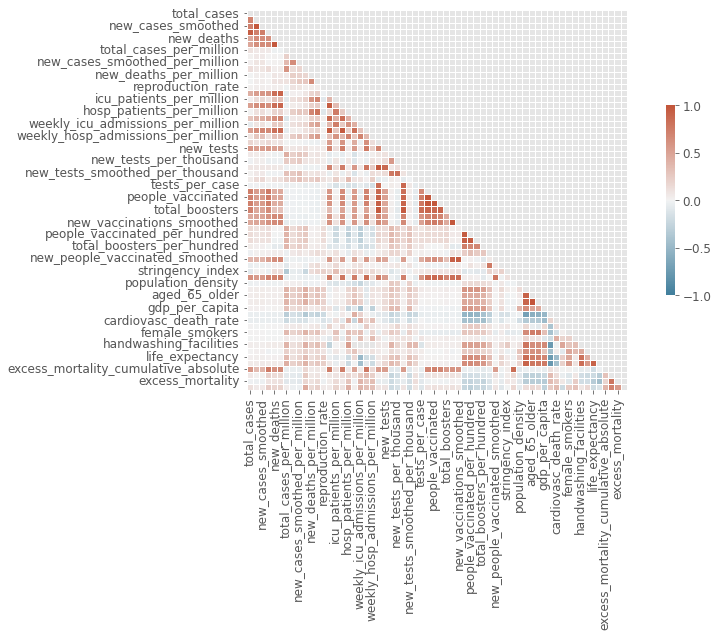

In [46]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Check Duplication

In [47]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [48]:
# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [49]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',\
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           209.93793                    0.125                  0.125   
1           209.93793                    0.125                  0.000   
2           209.93793                    0.125                  0.000   
3           209.93793                    0.125                  0.000   
4           209.93793                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                         5.23544  2020          2        Feb   24     Monday  
1                         5.23544  2020          2        Feb   25    Tuesday  
2                         5.23544  2020          2        Feb   26  Wednesday  
3                         5.23544  2020          2        Feb   27   Thursday  
4                         5.23544  2020          2        Feb   28     Friday

In [50]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.16002e+05  2.16002e+05         2.16002e+05             215025.00000   
mean   4.29124e+06  1.22901e+04         1.23245e+04              58460.05385   
std    2.69874e+07  8.51791e+04         8.31356e+04             103967.07923   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.88100e+03  0.00000e+00         6.14300e+00               1015.42800   
50%    4.60380e+04  5.40000e+01         9.35710e+01               9931.46200   
75%    5.05434e+05  9.61000e+02         1.12954e+03              70418.35000   
max    6.21869e+08  4.08174e+06         3.43627e+06             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  
count           215025.00000                    215025.00000  
mean               192.51295                       192.89657  
std               1050.45257                       667.15947  
min                  0.00000                         0.00000  
25%                  0.00000                         1.38600  
50%                  8.09100                        20.02900  
75%                100.58300                       139.97600  
max             195005.31300                     36401.60700

In [51]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         12803
location                              0
date                                  0
total_cases                        6833
new_cases                          6833
new_cases_smoothed                 6833
total_cases_per_million            7810
new_cases_per_million              7810
new_cases_smoothed_per_million     7810
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

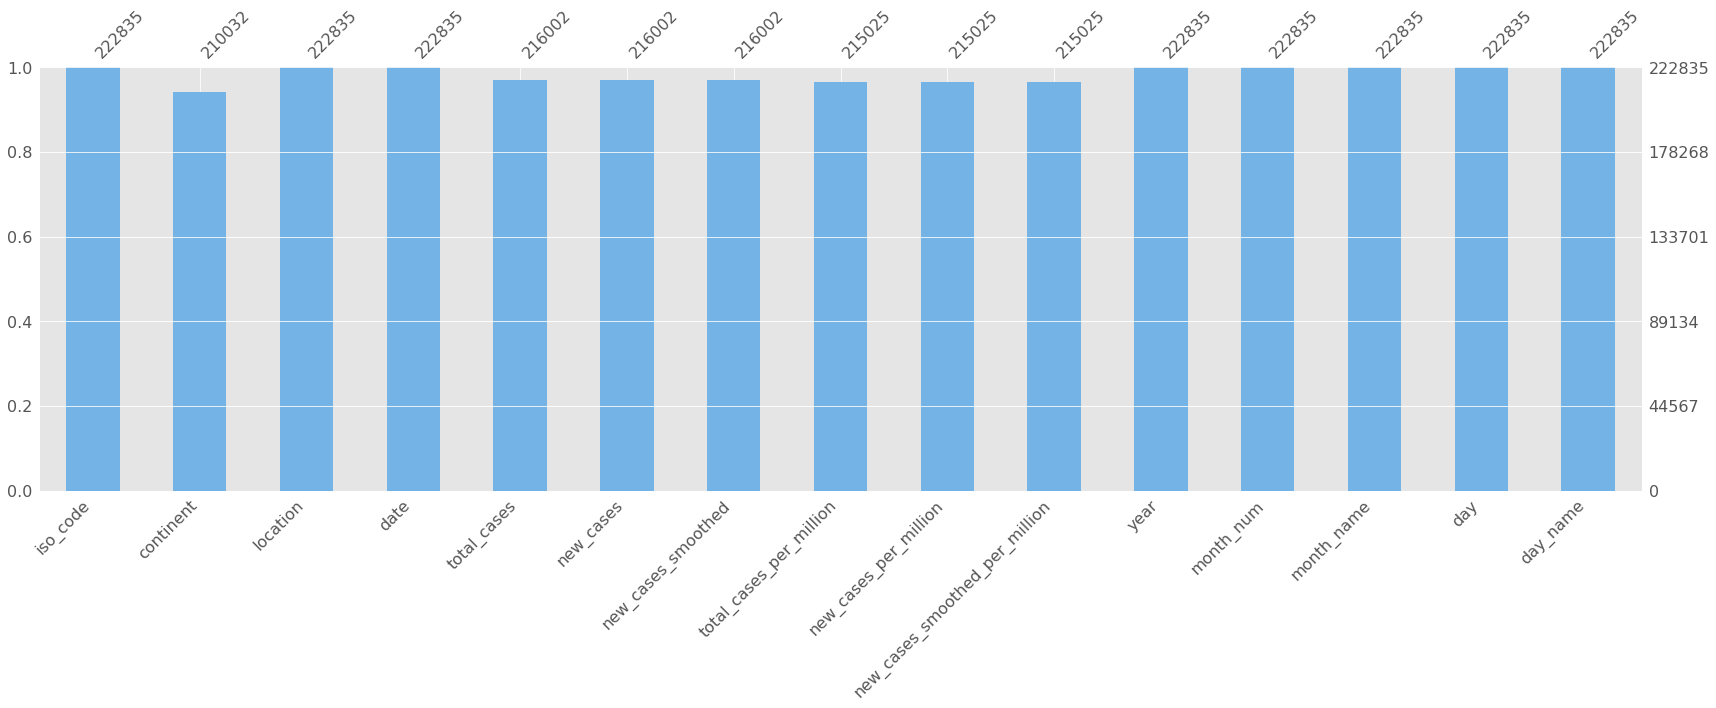

In [52]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

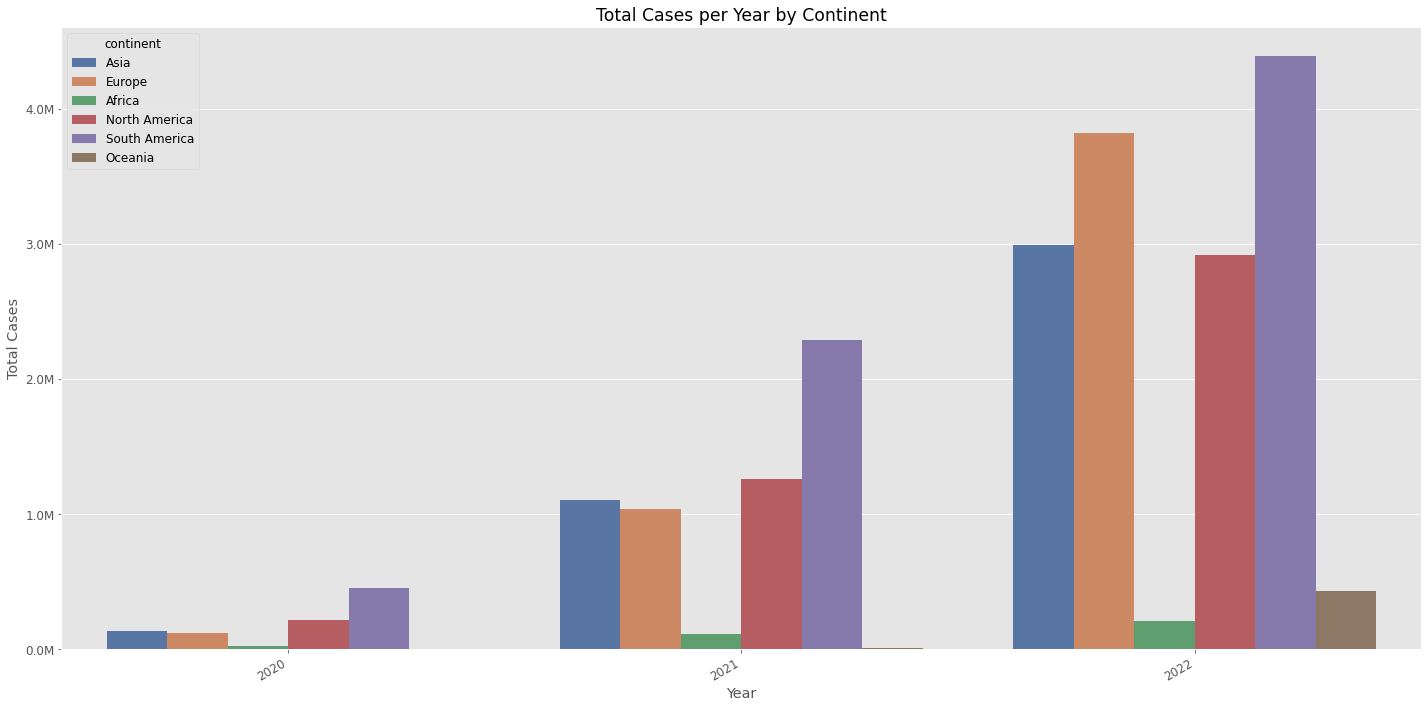

In [53]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', palette='deep',
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

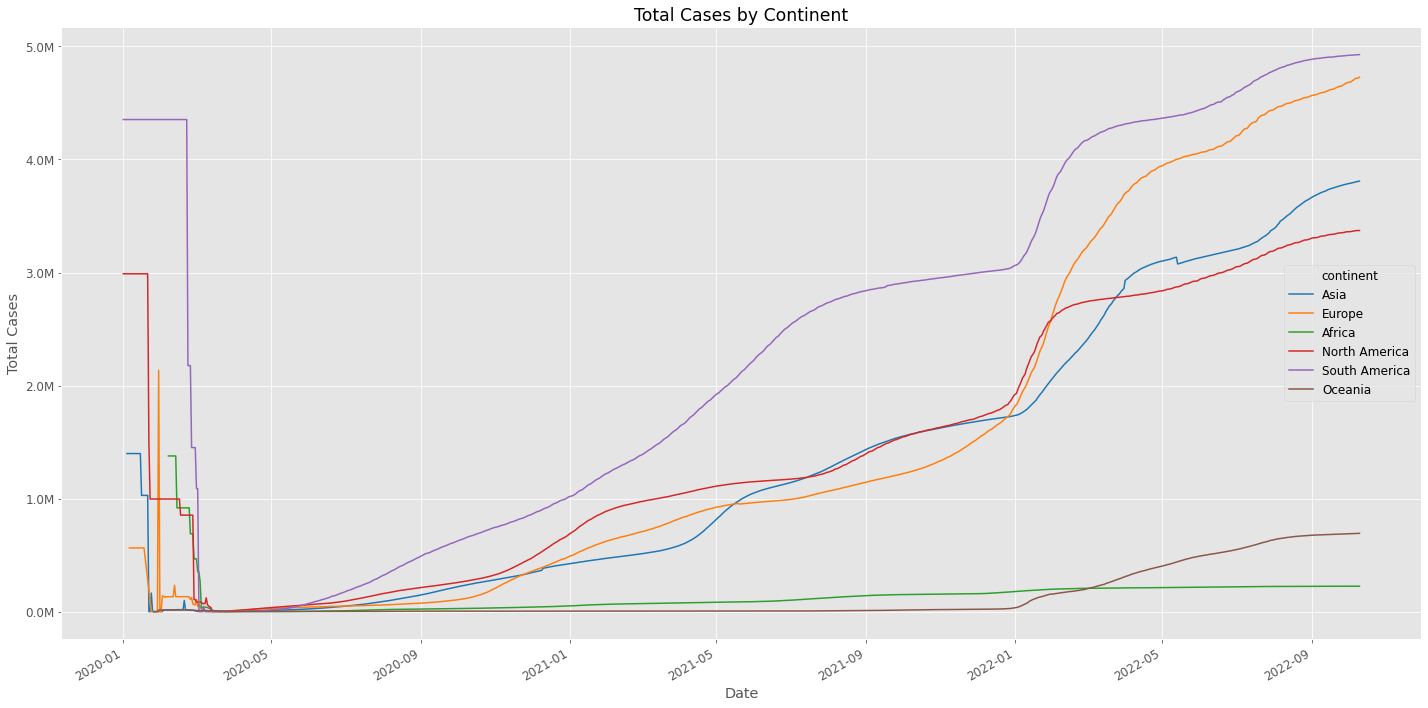

In [54]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

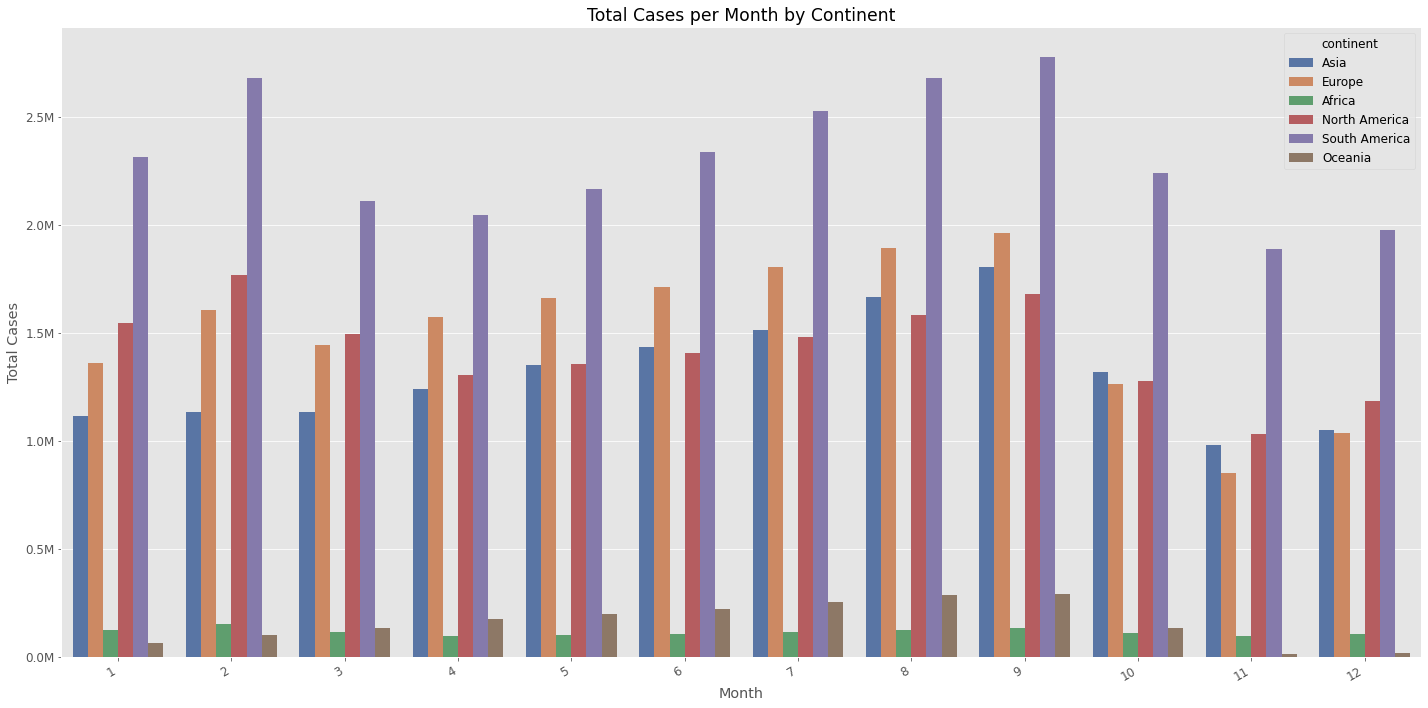

In [55]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='deep', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

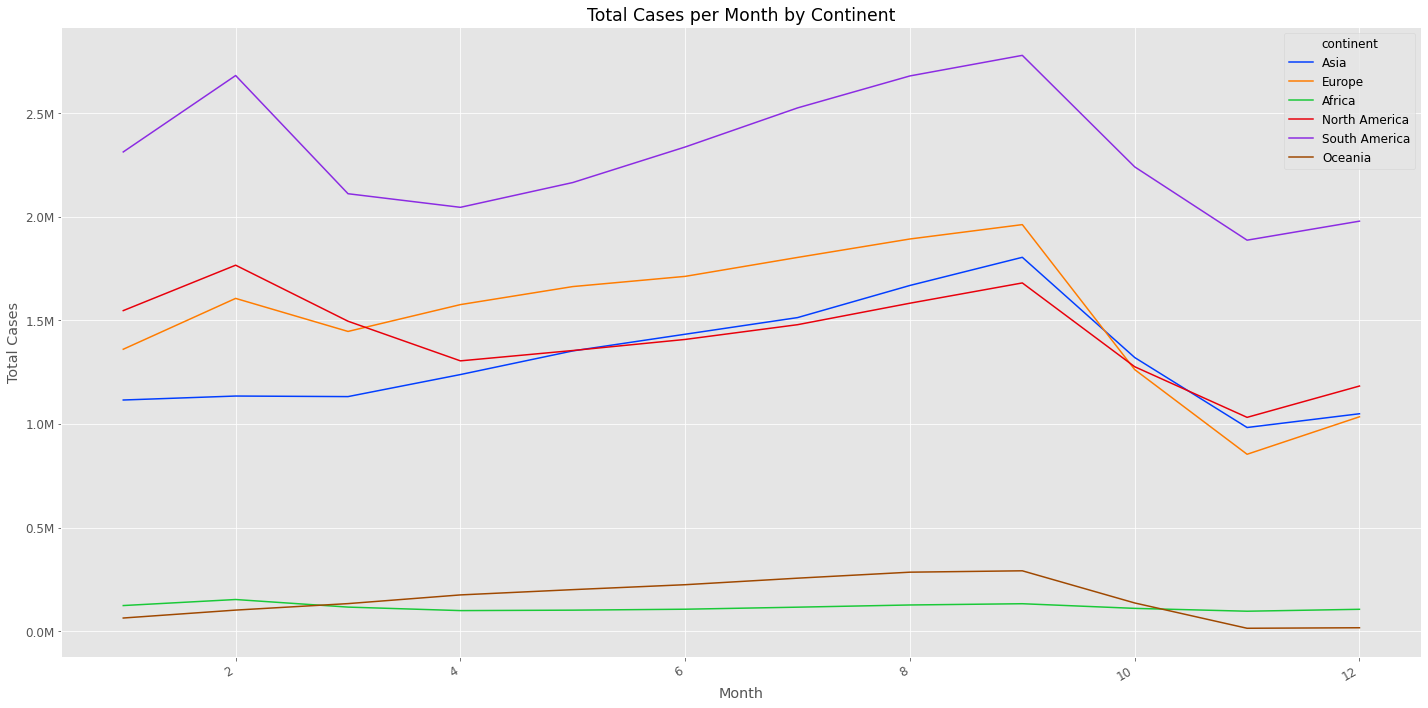

In [56]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='bright', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

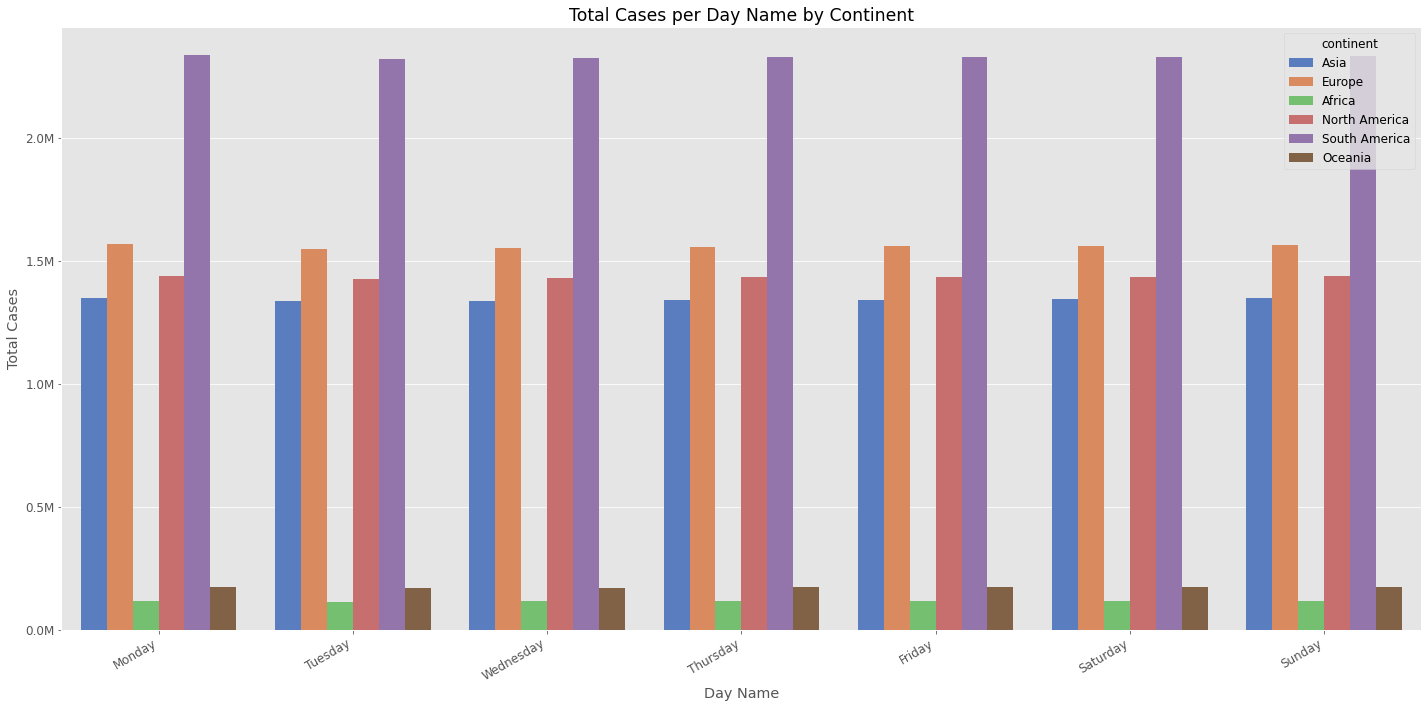

In [57]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', palette='muted',
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

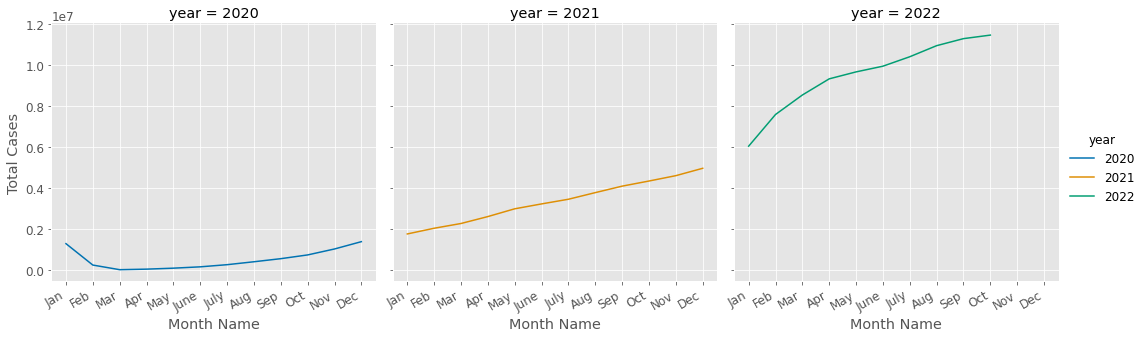

In [58]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='colorblind',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()
ax.yaxis.set_major_formatter(format_mill)

# Deaths Exploration

In [59]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4553.13305     8.37661   
1      AFG      Asia  Afghanistan 2020-02-25    4553.13305     8.37661   
2      AFG      Asia  Afghanistan 2020-02-26    4553.13305     8.37661   
3      AFG      Asia  Afghanistan 2020-02-27    4553.13305     8.37661   
4      AFG      Asia  Afghanistan 2020-02-28    4553.13305     8.37661   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              8.41808                   113.546                 0.20896   
1              8.41808                   113.546                 0.20896   
2              8.41808                   113.546                 0.20896   
3              8.41808                   113.546                 0.20896   
4              8.41808                   113.546                 0.20896   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.20998  2020          2        Feb   24     Monday  
1                          0.20998  2020          2        Feb   25    Tuesday  
2                          0.20998  2020          2        Feb   26  Wednesday  
3                          0.20998  2020          2        Feb   27   Thursday  
4                          0.20998  2020          2        Feb   28     Friday

In [60]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   2.12837e+05  212837.00000         212837.00000   
mean    6.78907e+04     129.05949            129.61960   
std     3.61629e+05     703.92684            689.28307   
min     1.00000e+00       0.00000              0.00000   
25%     8.60000e+01       0.00000              0.03207   
50%     8.66000e+02       1.00000              1.28600   
75%     8.53000e+03      12.00000             13.85700   
max     6.55849e+06   17737.00000          14858.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              211860.00000            211860.00000   
mean                  661.25290                 1.43289   
std                   941.31492                 4.92095   
min                     0.00000                 0.00000   
25%                    31.48175                 0.00000   
50%                   212.14346                 0.08700   
75%                   976.40746                 1.16600   
max                  6429.92600               553.80300   

       new_deaths_smoothed_per_million  
count                     211860.00000  
mean                           1.42841  
std                            3.23769  
min                            0.00000  
25%                            0.00600  
50%                            0.24300  
75%                            1.47700  
max                          148.67300

In [61]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          12803
location                               0
date                                   0
total_deaths                        9998
new_deaths                          9998
new_deaths_smoothed                 9998
total_deaths_per_million           10975
new_deaths_per_million             10975
new_deaths_smoothed_per_million    10975
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

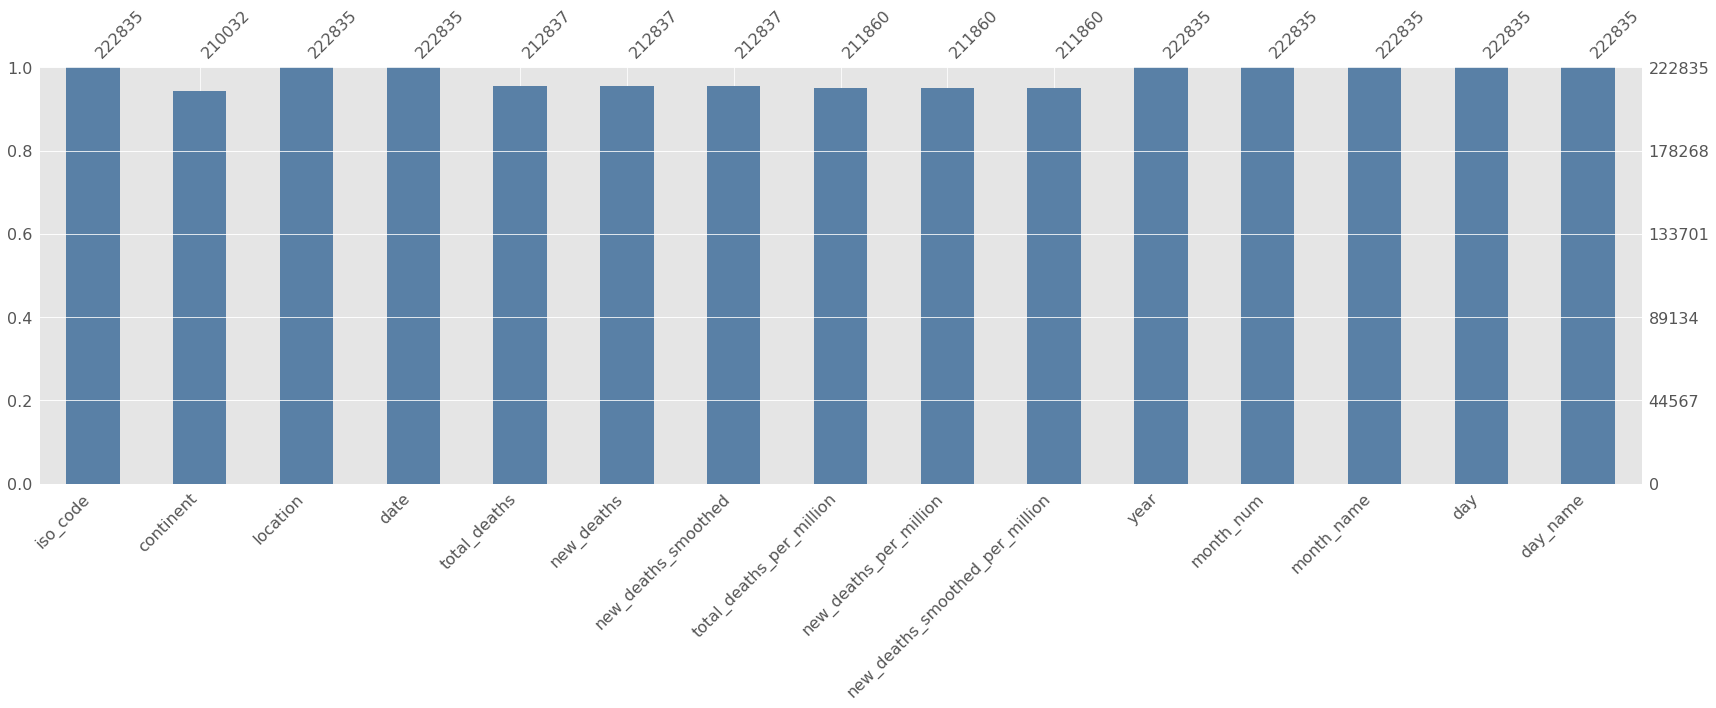

In [62]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

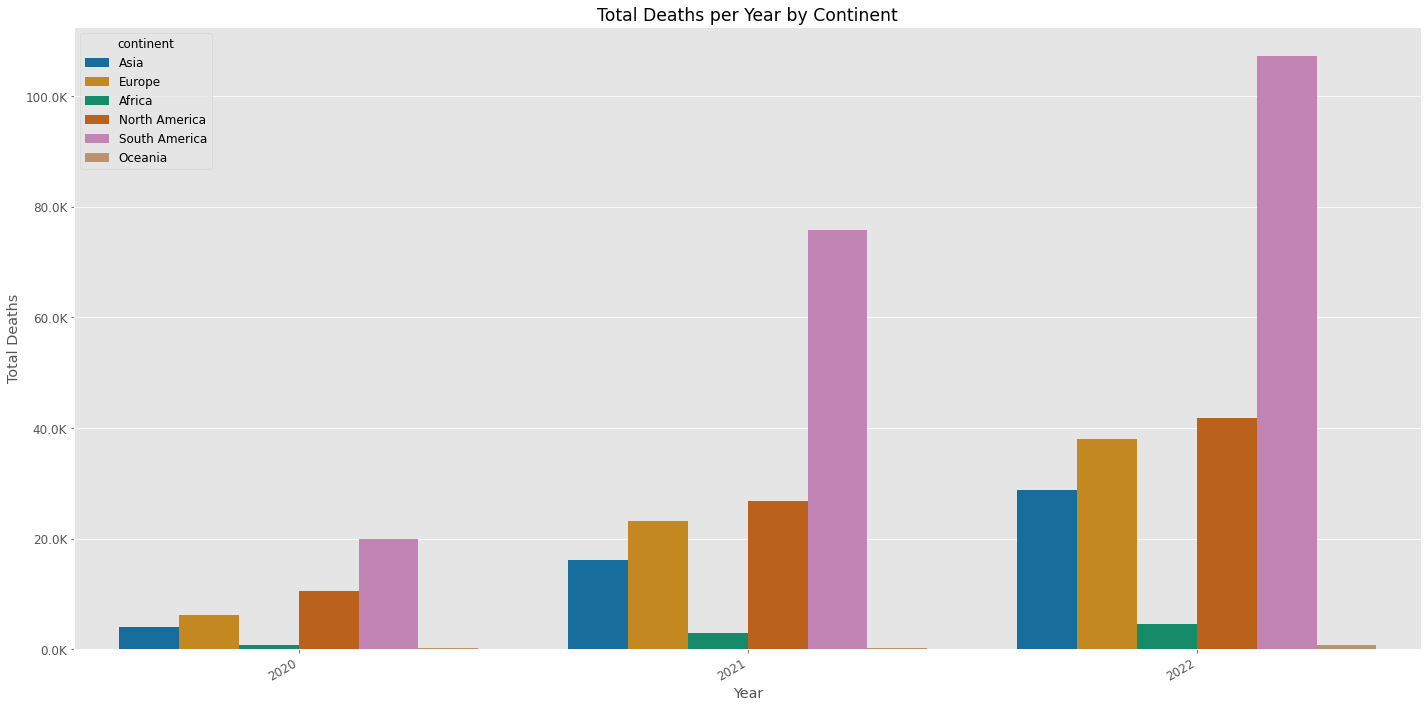

In [63]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', palette='colorblind', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

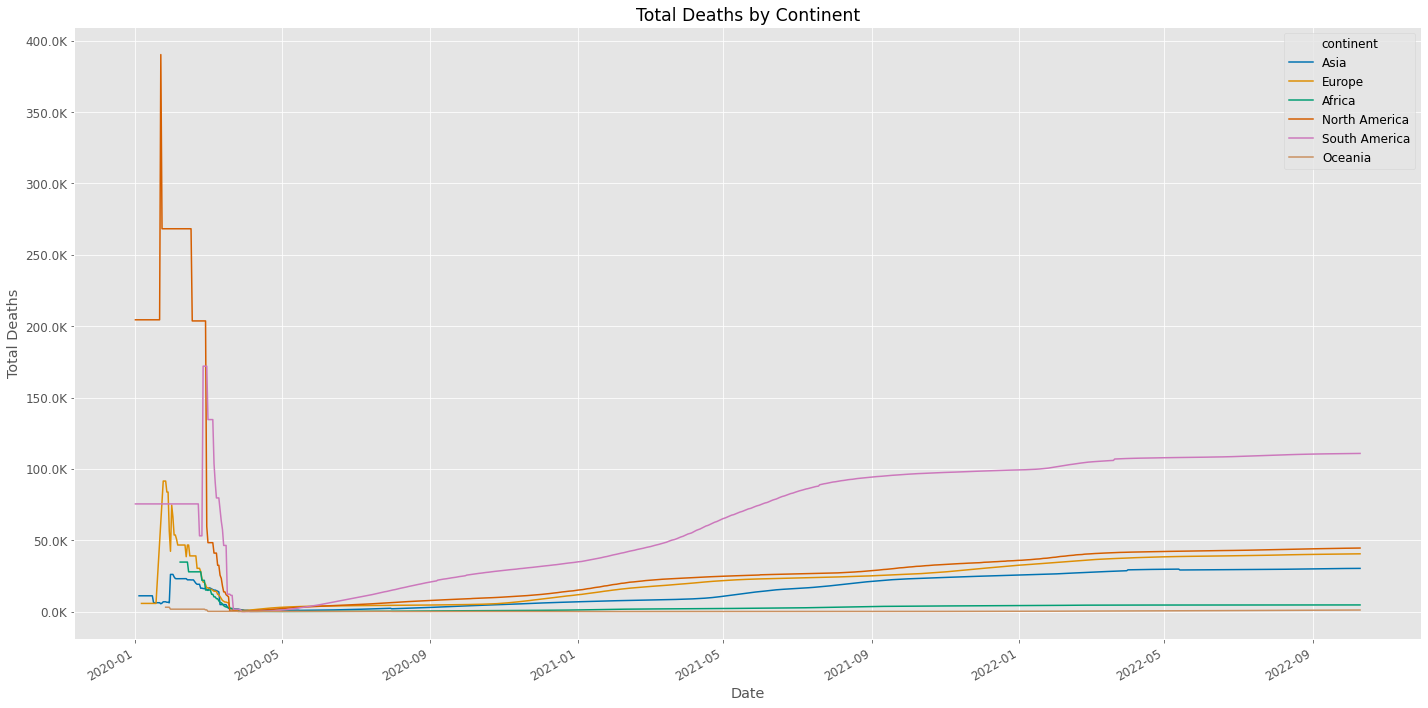

In [64]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', palette='colorblind',
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

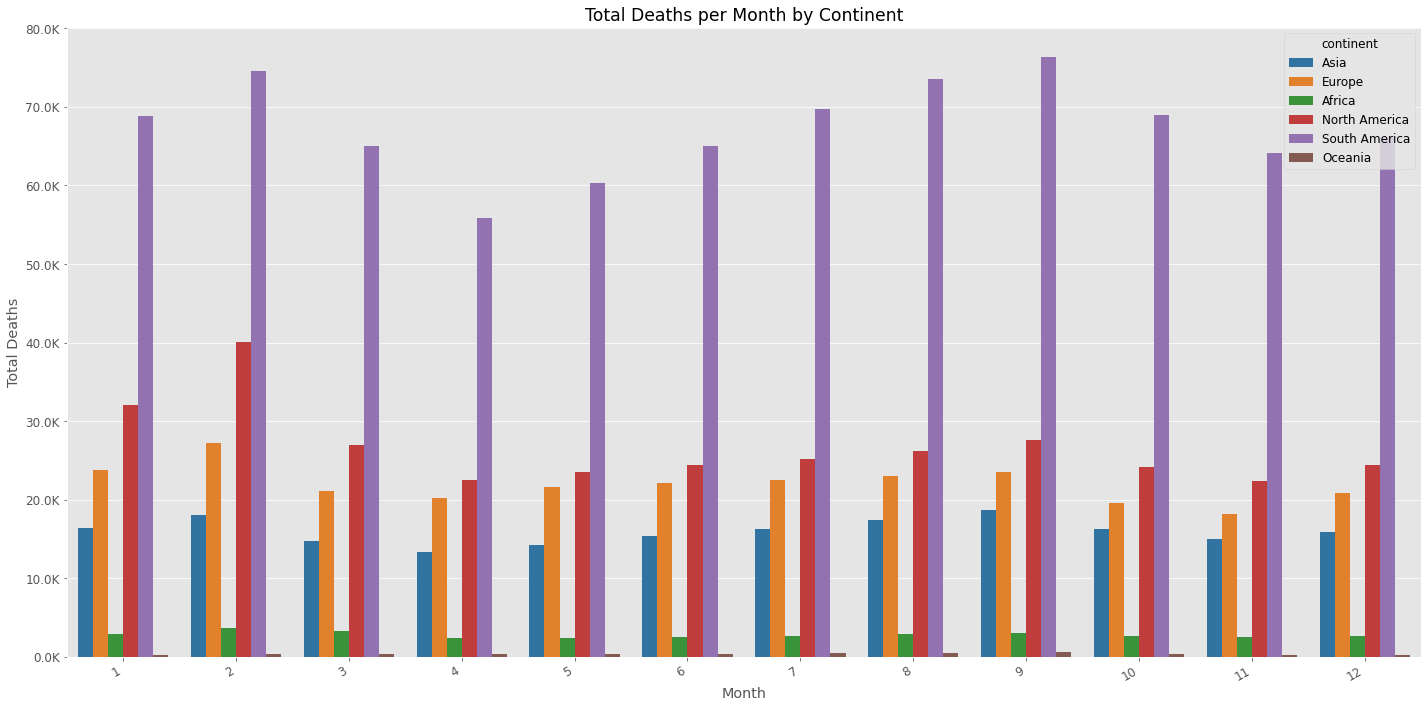

In [65]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='tab10', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

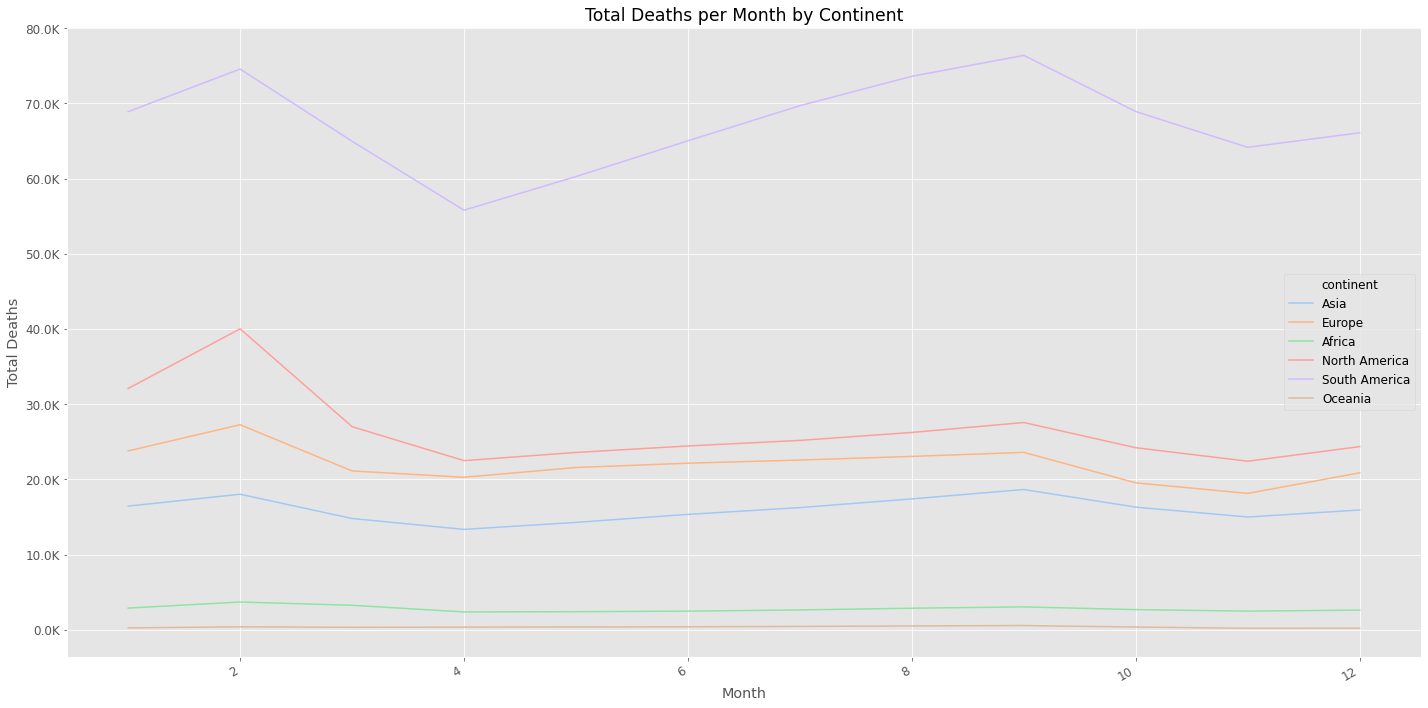

In [66]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='pastel',
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

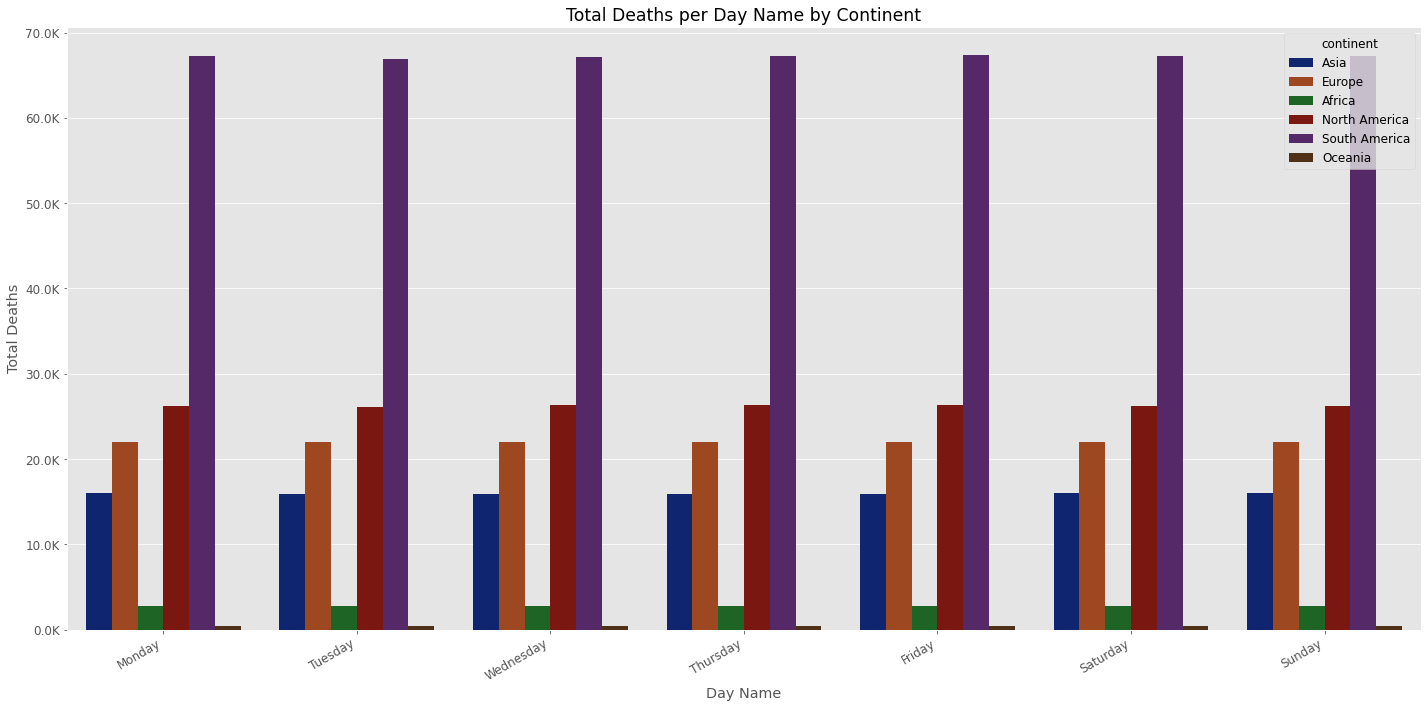

In [67]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', palette='dark',
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

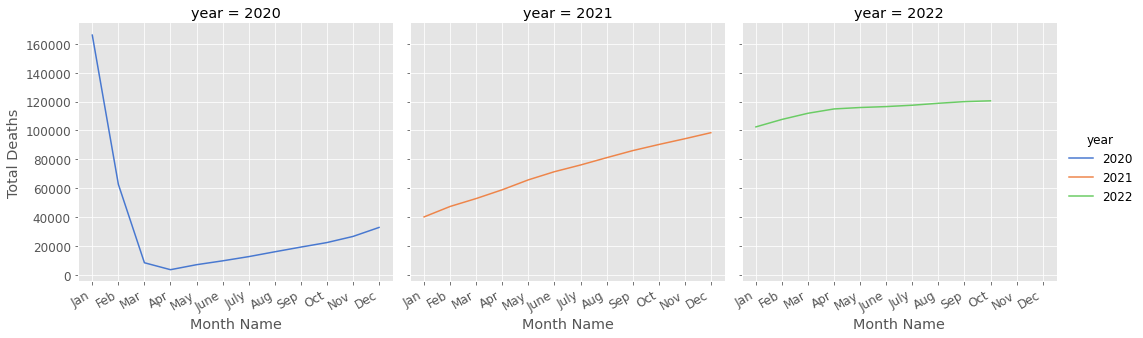

In [68]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='muted',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [69]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02468        0.13004         19.5295         NaN   
1                          0.02468        0.13004         19.5295         NaN   
2                          0.02468        0.13004         19.5295         NaN   
3                          0.02468        0.13004         19.5295         NaN   
4                          0.02468        0.13004         19.5295         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [70]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.47178e+05  1.76584e+05              176584.00000   
mean   4.74569e+04  3.06684e+07                 851.18727   
std    1.90275e+05  2.42204e+08                2175.08398   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    1.01711e+03  2.00292e+05                  36.73350   
50%    4.91400e+03  9.30700e+05                 186.80650   
75%    2.34408e+04  5.48900e+06                 740.45600   
max    3.58556e+07  9.21400e+09               32925.82600   

       new_tests_per_thousand  new_tests_smoothed  \
count            147178.00000         1.72896e+05   
mean                  3.63307         1.22560e+05   
std                   9.07737         1.07998e+06   
min                   0.00000         0.00000e+00   
25%                   0.27900         6.39000e+02   
50%                   0.95900         3.50060e+03   
75%                   3.03329         2.22175e+04   
max                 531.06200         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     172896.00000   166244.00000     1.65304e+05  
mean                           2.92295        0.09442     2.17331e+03  
std                            7.12266        0.10275     2.94442e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15839        0.01964     1.05723e+01  
50%                            0.78800        0.06590     2.83000e+01  
75%                            2.66000        0.12900     8.33000e+01  
max                          147.60300        1.00000     1.02363e+06

In [71]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           12803
location                                0
date                                    0
new_tests                           75657
total_tests                         46251
total_tests_per_thousand            46251
new_tests_per_thousand              75657
new_tests_smoothed                  49939
new_tests_smoothed_per_thousand     49939
positive_rate                       56591
tests_per_case                      57531
tests_units                        116047
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

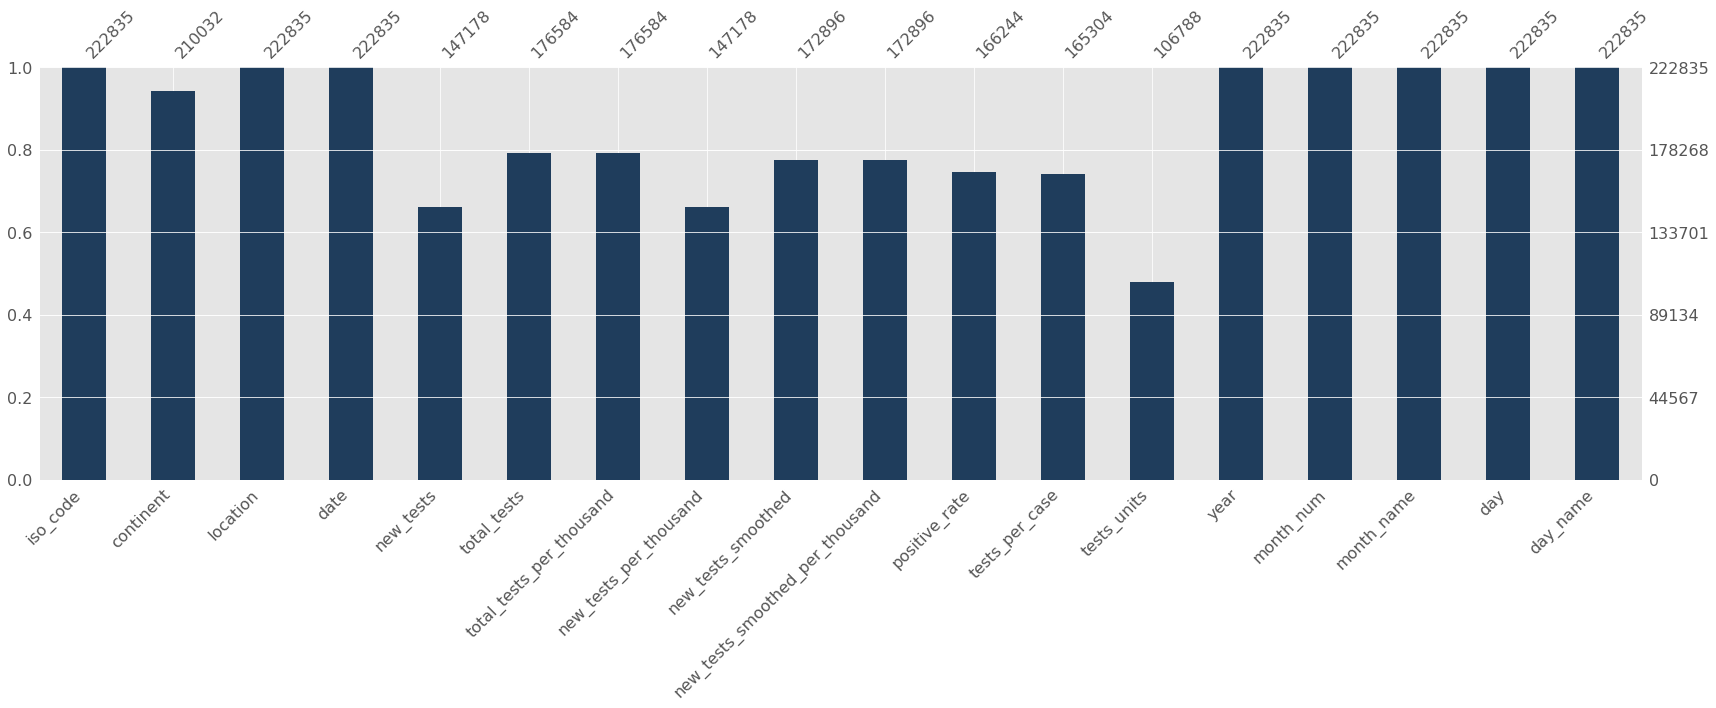

In [72]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

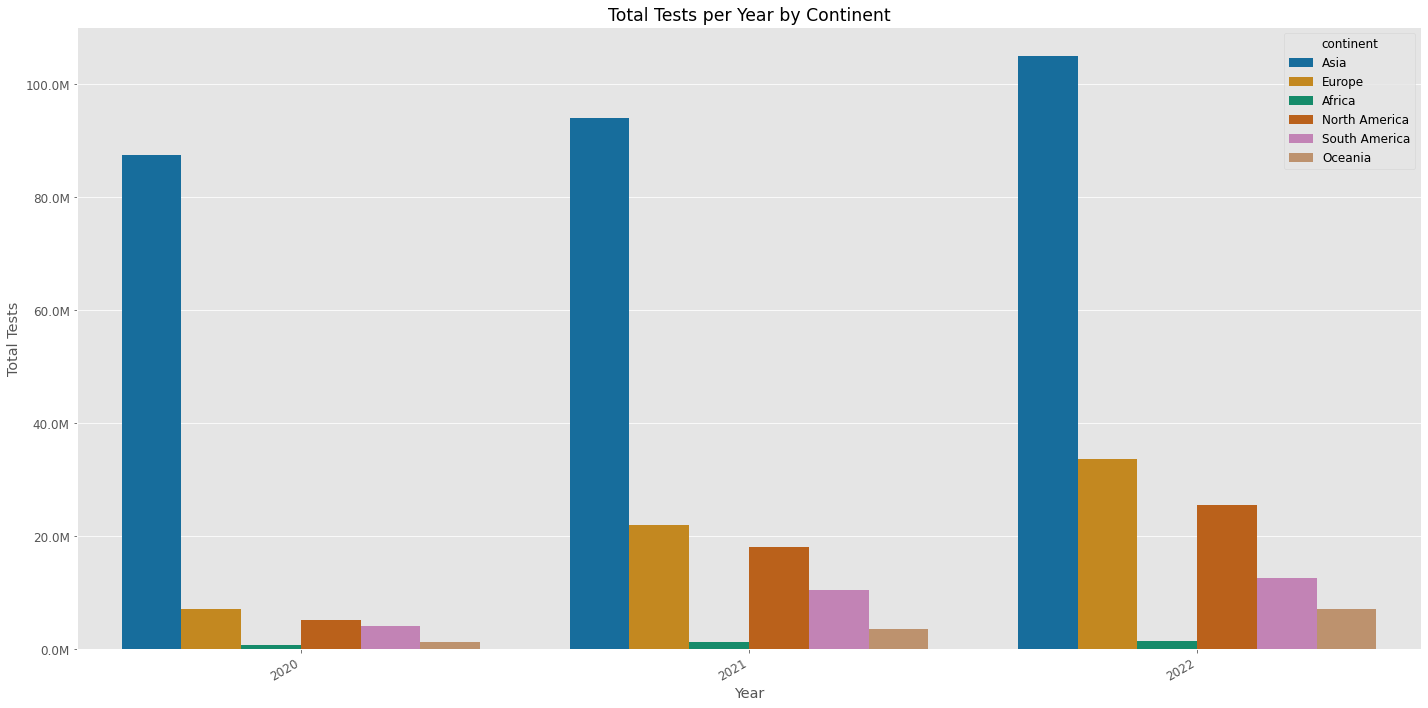

In [73]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', palette='colorblind',
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

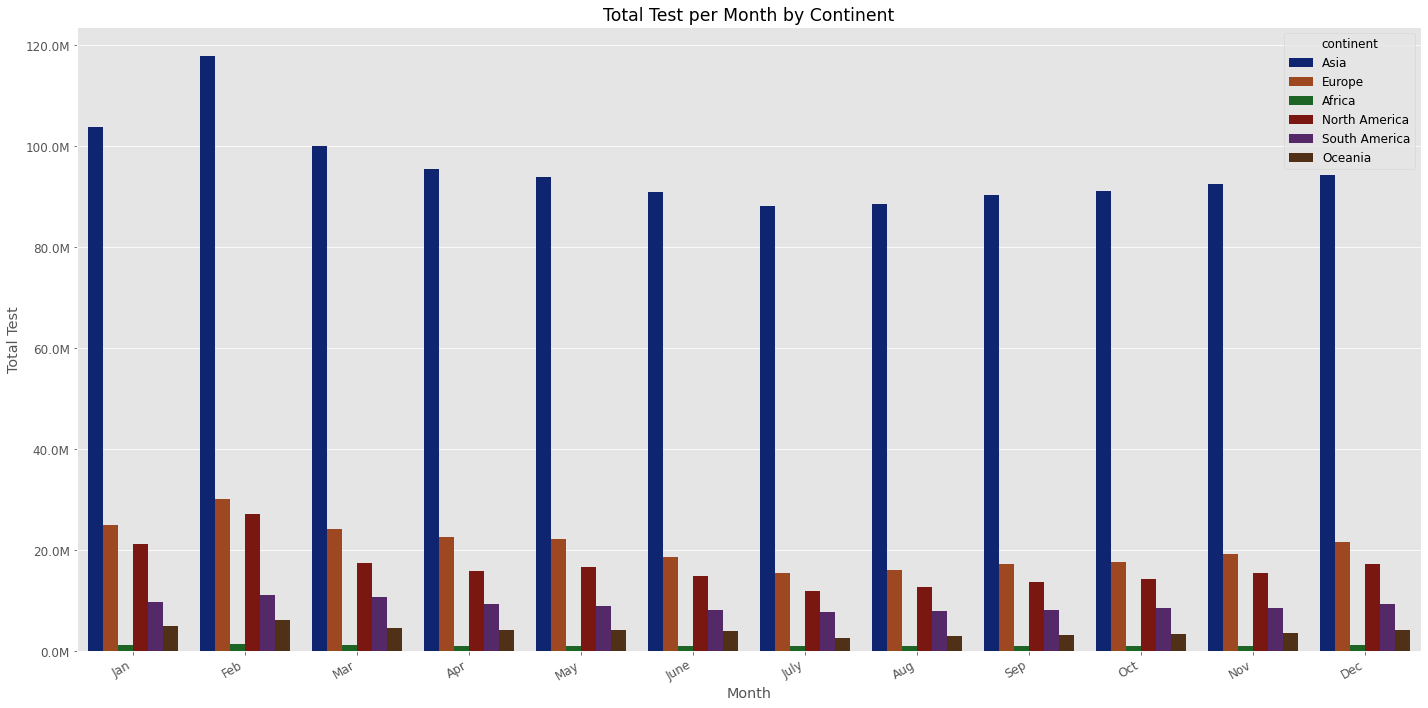

In [74]:
plot_bar(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', palette='dark', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

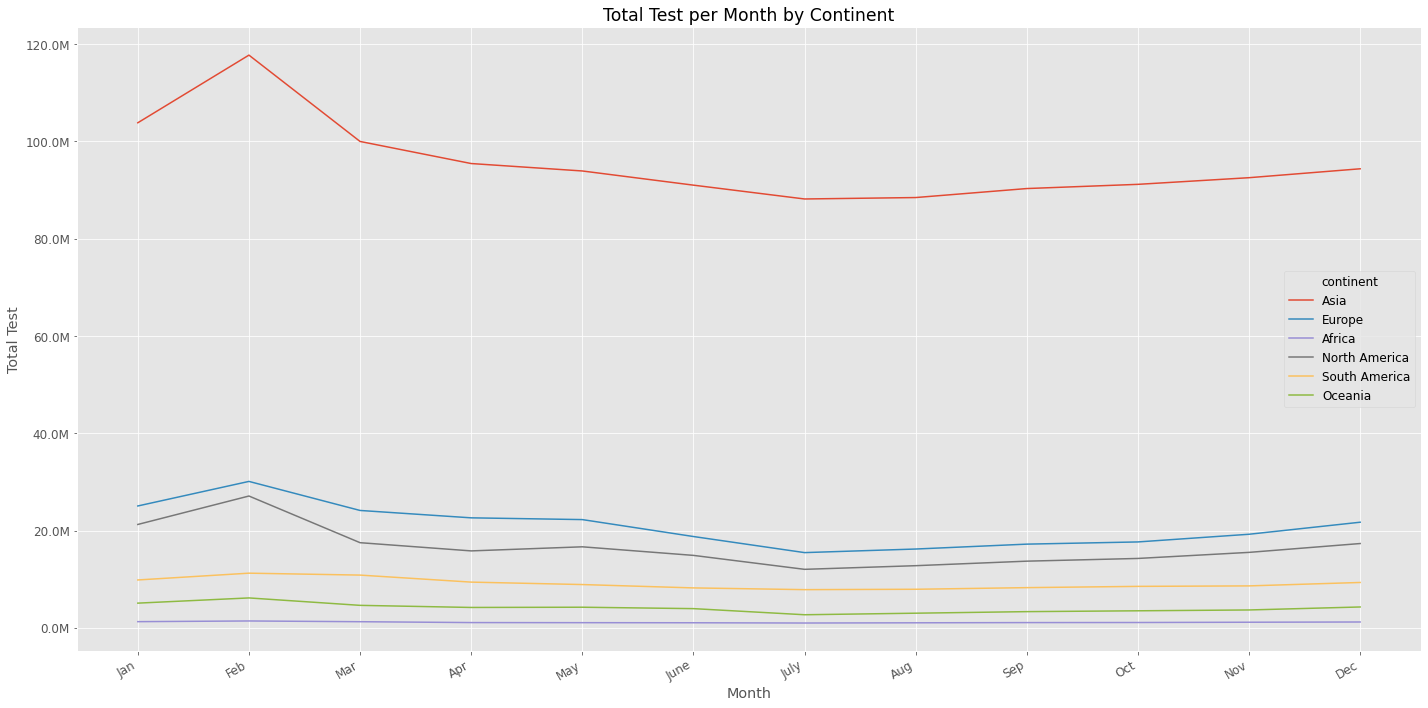

In [75]:
plot_line(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

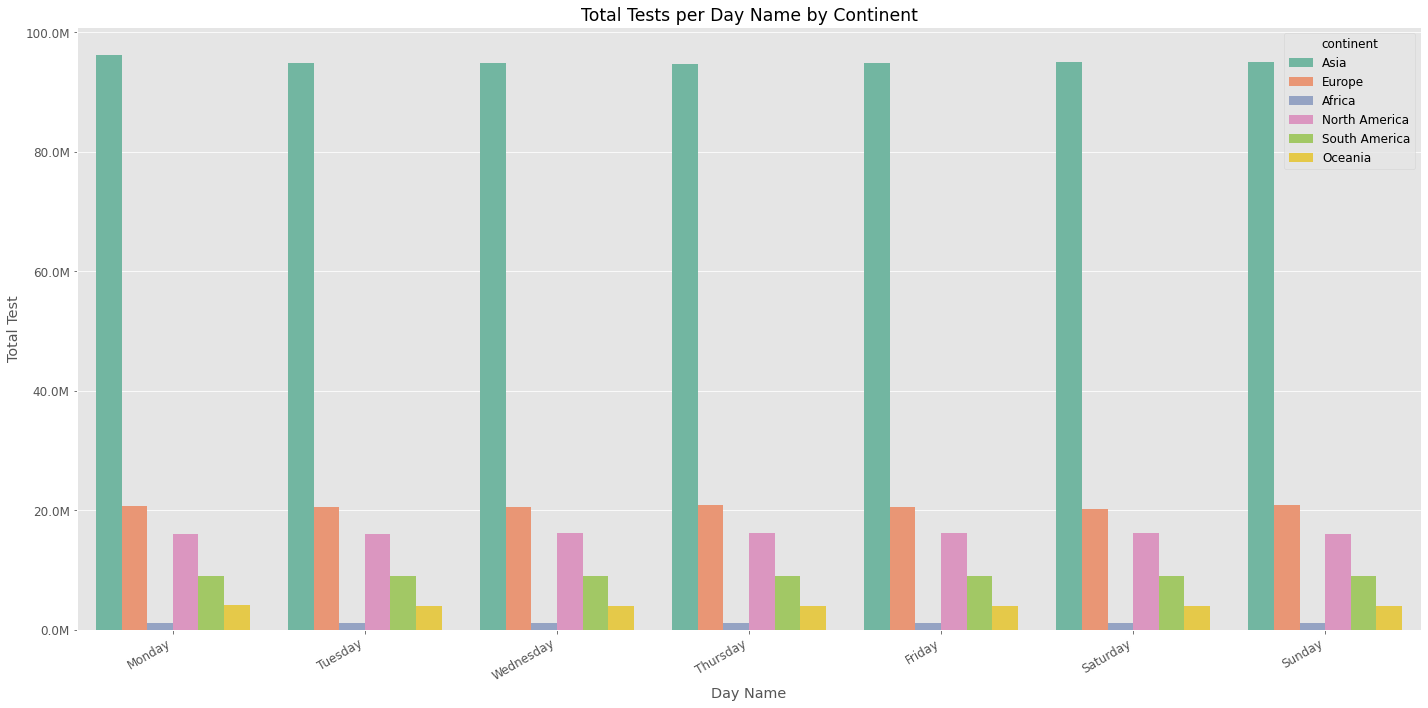

In [76]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', palette='Set2',
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

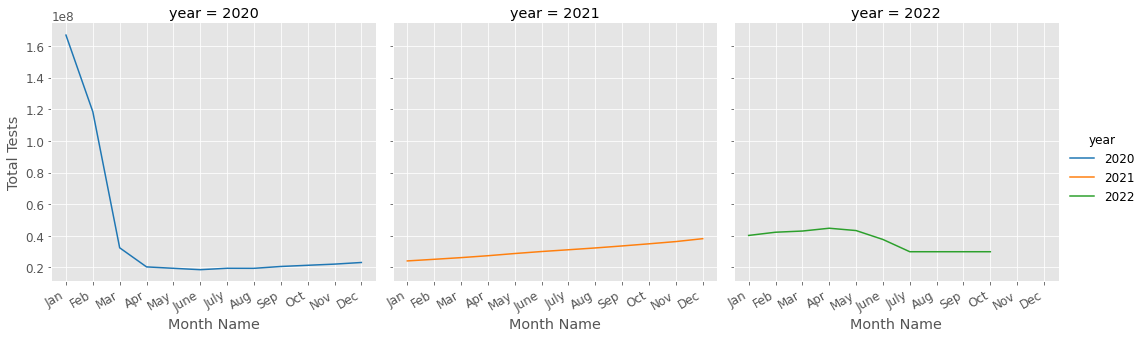

In [77]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [78]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         4.80752e+06   
1      AFG      Asia  Afghanistan 2020-02-25         4.80752e+06   
2      AFG      Asia  Afghanistan 2020-02-26         4.80752e+06   
3      AFG      Asia  Afghanistan 2020-02-27         4.80752e+06   
4      AFG      Asia  Afghanistan 2020-02-28         4.80752e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        4.39843e+06              4.24770e+06             NaN   
1        4.39843e+06              4.24770e+06             NaN   
2        4.39843e+06              4.24770e+06             NaN   
3        4.39843e+06              4.24770e+06             NaN   
4        4.39843e+06              4.24770e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0            4714.4                 20214.6944   
1            4714.4                 20214.6944   
2            4714.4                 20214.6944   
3            4714.4                 20214.6944   
4            4714.4                 20214.6944   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                        11.98908                       10.96875   
1                        11.98908                       10.96875   
2                        11.98908                       10.96875   
3                        11.98908                       10.96875   
4                        11.98908                       10.96875   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                             10.59292                         NaN   
1                             10.59292                         NaN   
2                             10.59292                         NaN   
3                             10.59292                         NaN   
4                             10.59292                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              504.17487                     18590.26486   
1                              504.17487                     18590.26486   
2                              504.17487                     18590.26486   
3                              504.17487                     18590.26486   
4                              504.17487                     18590.26486   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.04641  2020          2        Feb   
1                                     0.04641  2020          2        Feb   
2                                     0.04641  2020          2        Feb   
3                                     0.04641  2020          2        Feb   
4                                     0.04641  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [79]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         2.13149e+05        2.13149e+05              2.13149e+05   
mean          1.31582e+08        6.34904e+07              5.42231e+07   
std           7.42828e+08        3.45302e+08              3.00878e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.65793e+05        2.19717e+05              1.81499e+05   
50%           2.46555e+06        1.45132e+06              1.22264e+06   
75%           1.46620e+07        7.73370e+06              6.76752e+06   
max           1.27966e+10        5.39245e+09              4.96481e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.92747e+05       1.77387e+05                2.13149e+05   
mean      2.18666e+07       4.57810e+05                3.70279e+05   
std       1.20029e+08       2.32939e+06                2.10048e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.97721e+04       2.99400e+03                9.33000e+02   
50%       4.73174e+05       1.51907e+04                7.88800e+03   
75%       4.30121e+06       8.86289e+04                5.27557e+04   
max       2.55690e+09       4.96755e+07                4.36901e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    213149.00000                   213149.00000   
mean                         78.72763                       38.81172   
std                          60.92268                       25.23617   
min                           0.00000                        0.00000   
25%                          24.63671                       16.28644   
50%                          72.39799                       39.44665   
75%                         117.11073                       57.38000   
max                         374.38000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         213149.00000                192747.00000   
mean                              34.19376                    20.35417   
std                               23.62765                    20.28882   
min                                0.00000                     0.00000   
25%                               12.85400                     2.63706   
50%                               32.88250                    14.40705   
75%                               51.08000                    32.65000   
max                              126.79000                   139.74000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           213149.00000                     2.13149e+05   
mean                              2610.73402                     1.40877e+05   
std                               3205.96427                     8.35975e+05   
min                                  0.00000                     0.00000e+00   
25%                                576.00000                     3.01000e+02   
50%                               1847.32134                     3.32637e+03   
75%                               3424.66944                     2.07820e+04   
max                             117862.00000                     2.10711e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                213149.00000  
mean                                      0.11274  
std                                       0.18507  
min                                       0.00000  
25%                                       0.01900  
50%                                       0.07500  
75%                                       0.13175  
max                                      11.78600

In [80]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     12803
location                                          0
date                                              0
total_vaccinations                             9686
people_vaccinated                              9686
people_fully_vaccinated                        9686
total_boosters                                30088
new_vaccinations                              45448
new_vaccinations_smoothed                      9686
total_vaccinations_per_hundred                 9686
people_vaccinated_per_hundred                  9686
people_fully_vaccinated_per_hundred            9686
total_boosters_per_hundred                    30088
new_vaccinations_smoothed_per_million          9686
new_people_vaccinated_smoothed                 9686
new_people_vaccinated_smoothed_per_hundred     9686
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

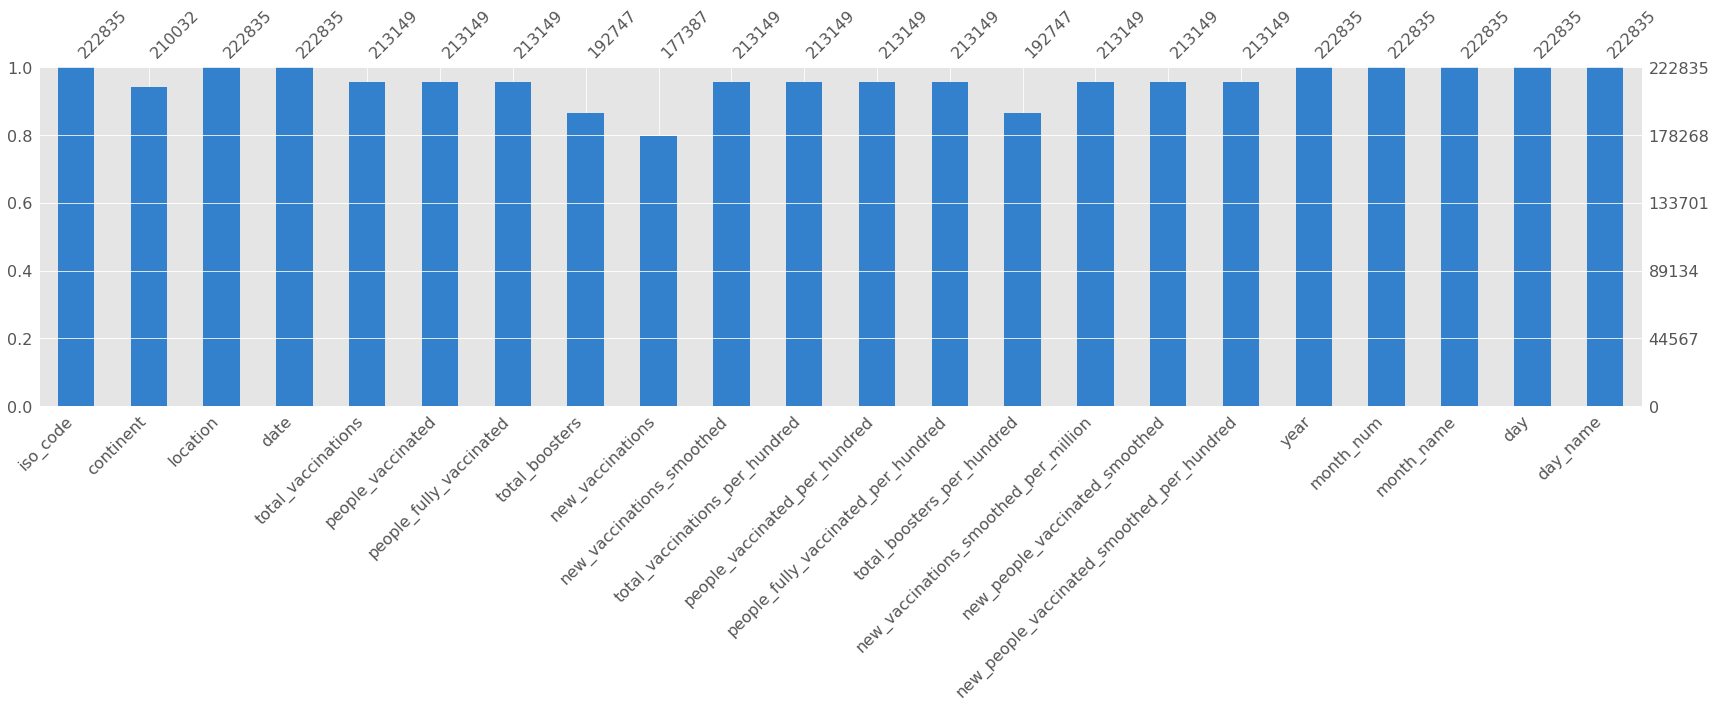

In [81]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

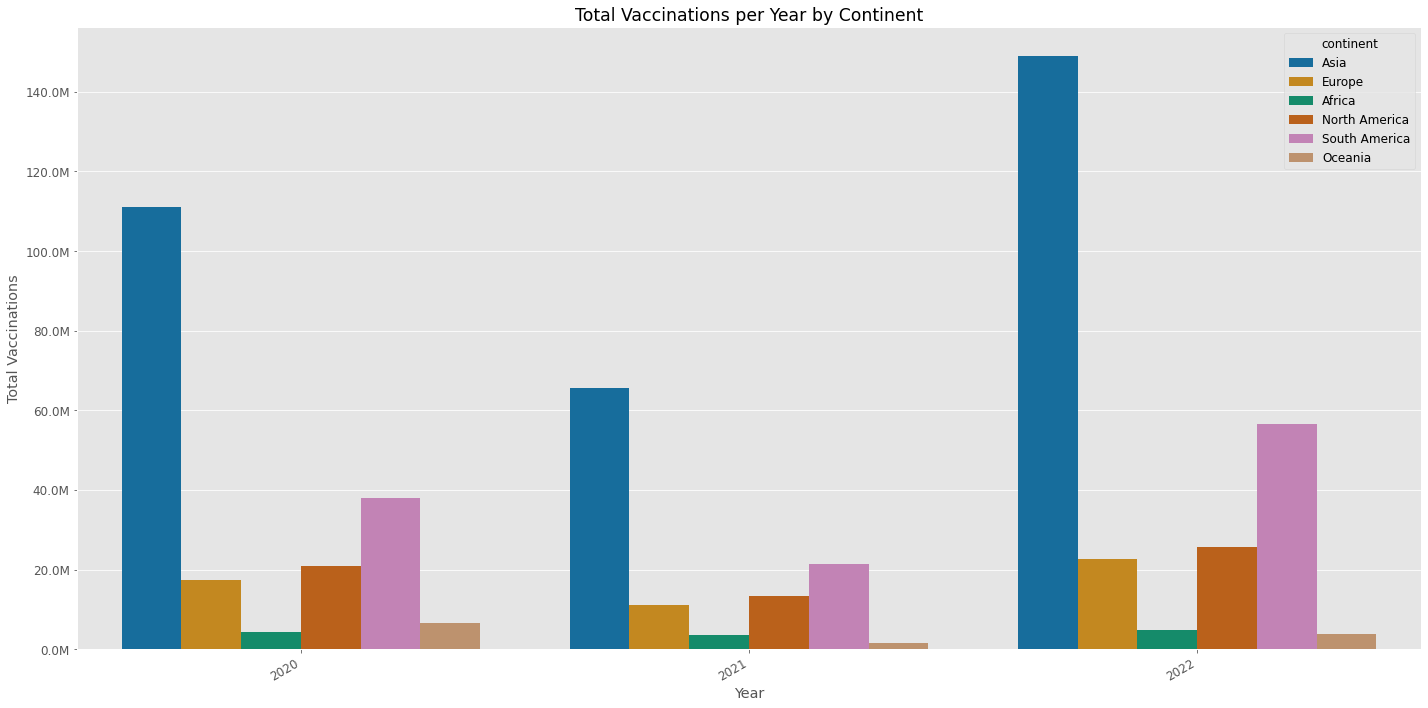

In [82]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', palette='colorblind', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

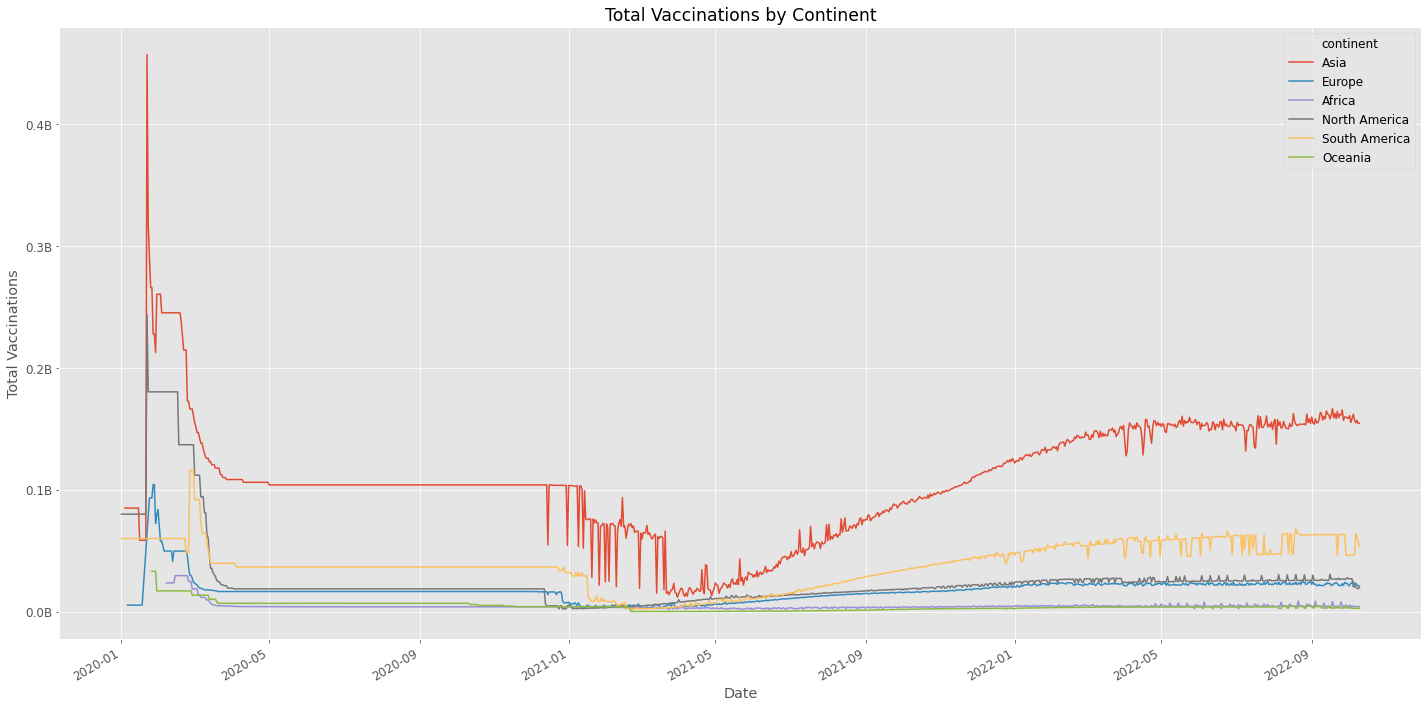

In [83]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

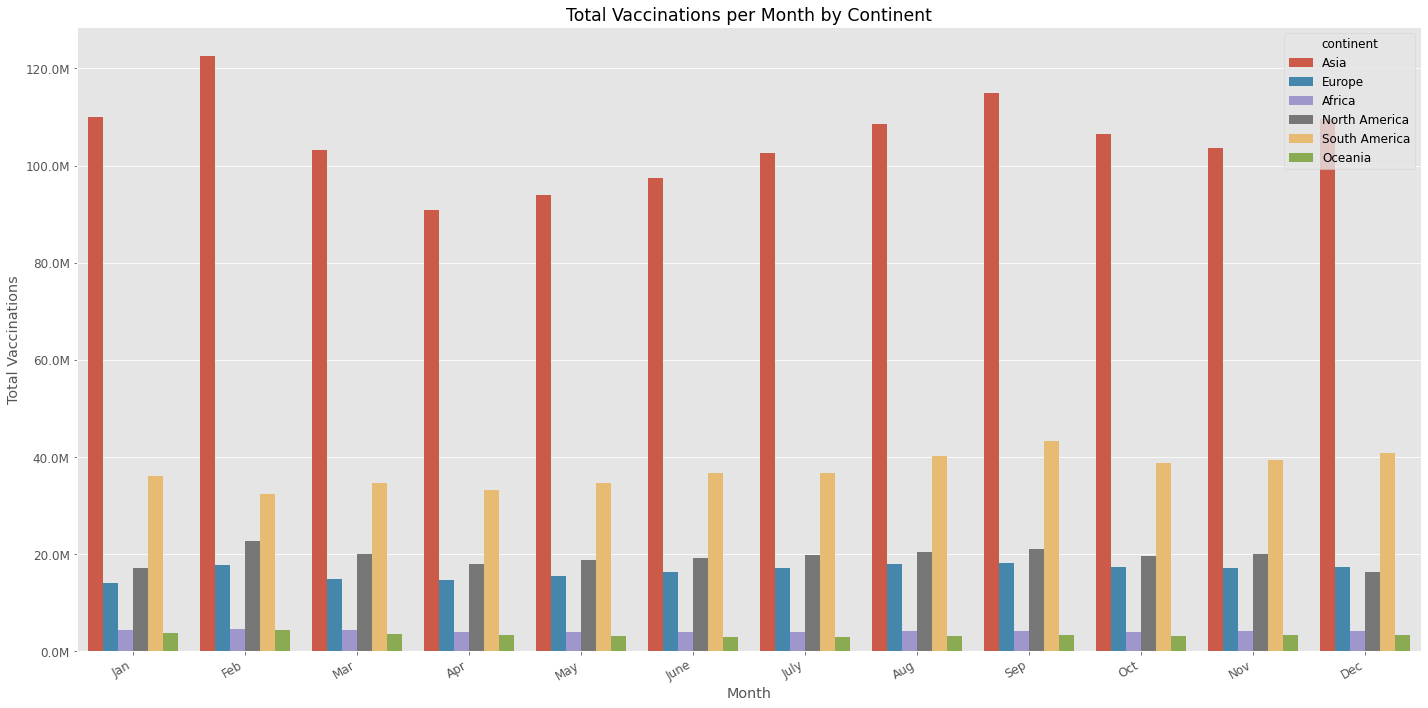

In [84]:
plot_bar(
    data=df_vacc,
    x='month_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

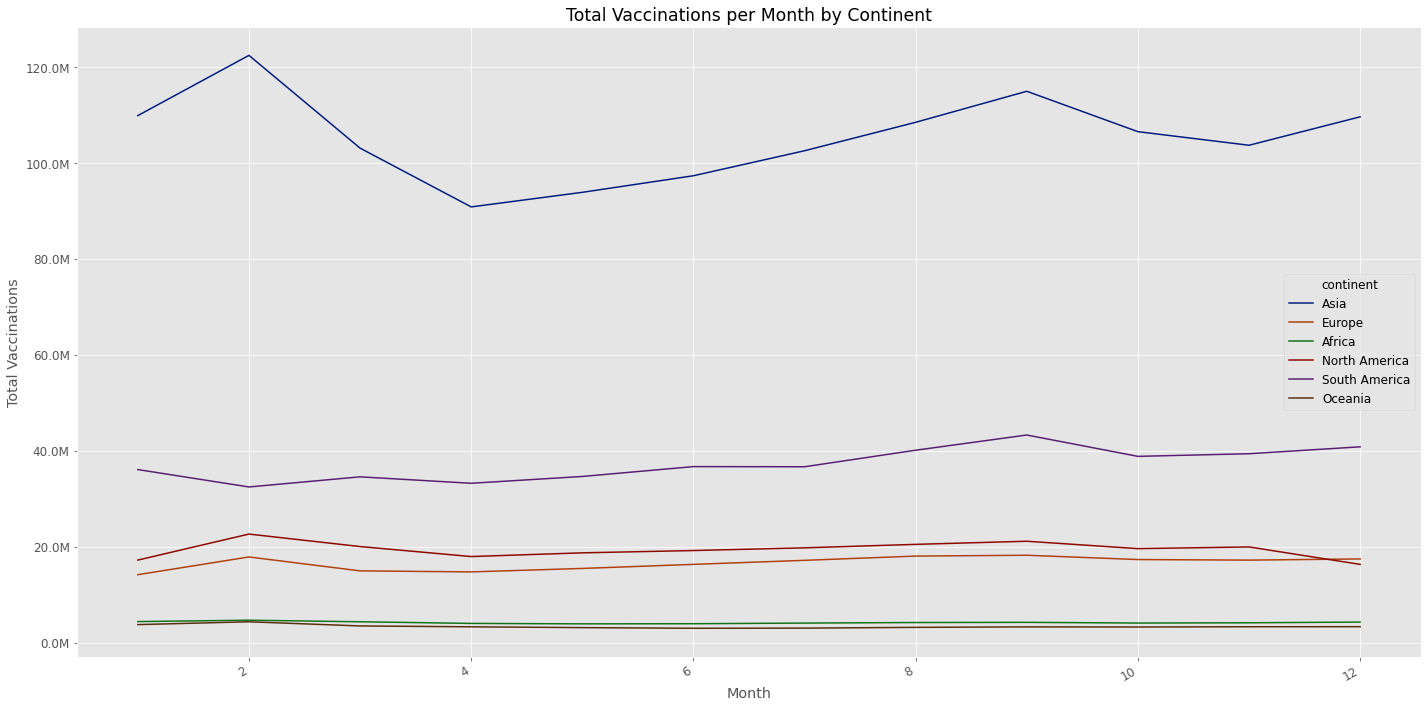

In [85]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', palette='dark', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

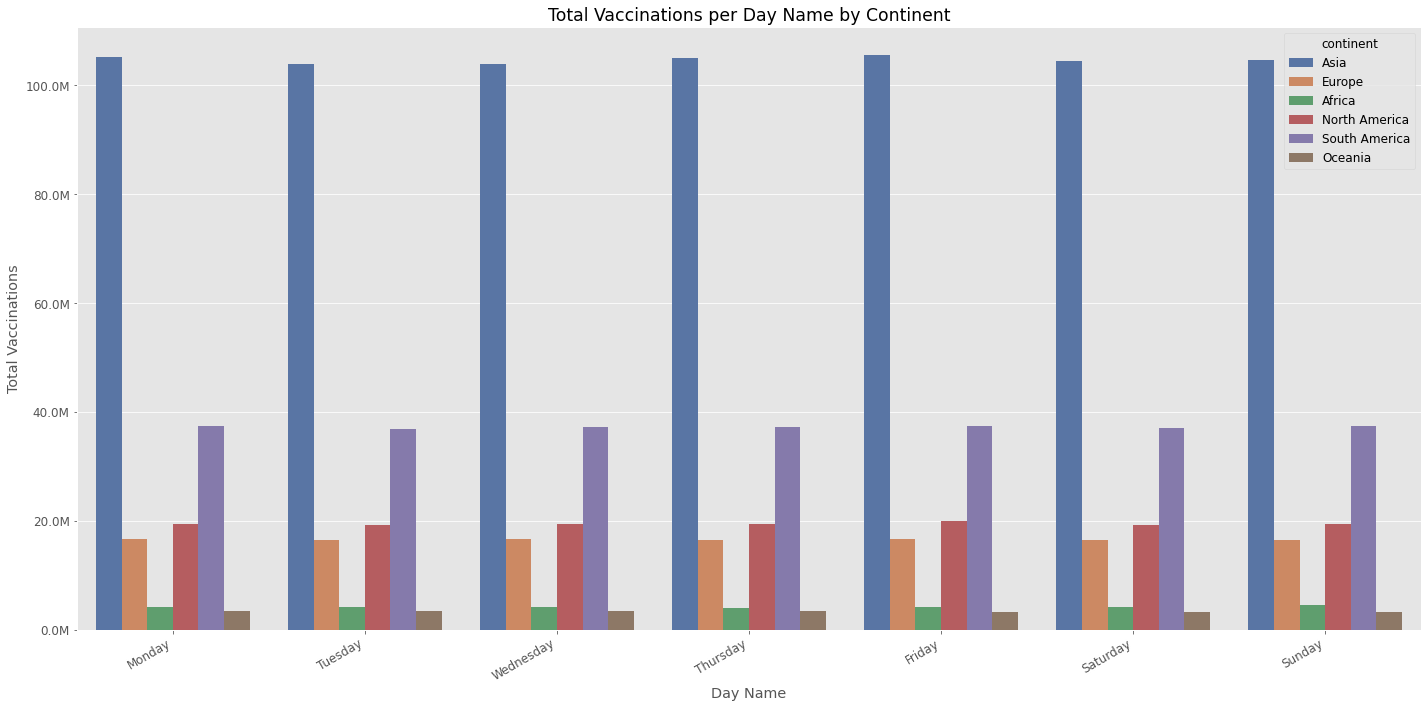

In [86]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', palette='deep', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

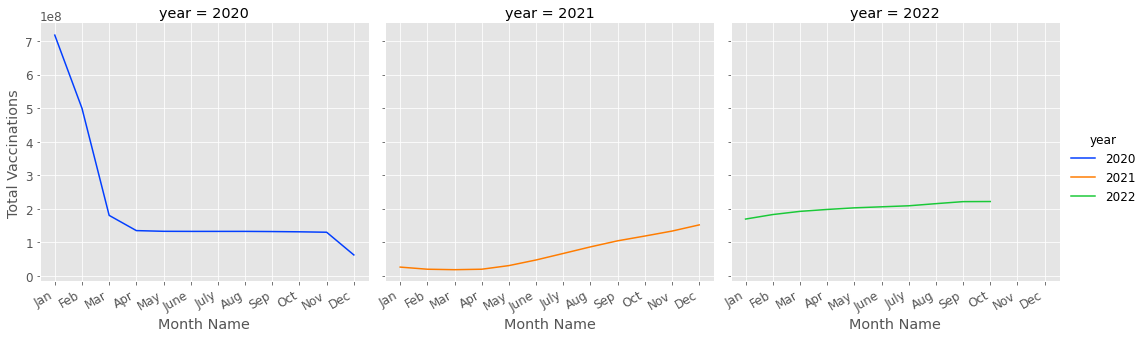

In [87]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [88]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [89]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.21541e+05        197922.00000  183155.00000   181222.00000   
mean   1.42311e+08           456.47274      30.61659        8.80377   
std    6.93855e+08          2105.28110       9.06223        6.12653   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.21626e+05            37.31200      22.30000        3.52600   
50%    7.42506e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   182197.00000    182515.00000     118920.00000           182666.00000   
mean         5.55357     19552.71743         13.63241              261.41986   
std          4.16198     20538.15360         20.03127              120.22319   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.03200     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.40000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         192035.00000    138265.00000   136372.0000   
mean               8.38563        10.67479       32.8089   
std                4.73182        10.62508       13.5344   
min                0.99000         0.10000        7.7000   
25%                5.31000         1.90000       21.6000   
50%                7.20000         6.30000       31.4000   
75%               10.59000        19.30000       41.3000   
max               30.53000        44.00000       78.1000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             89914.00000                162559.00000     208223.00000   
mean                 50.93419                     3.08919         73.61995   
std                  31.88336                     2.55250          7.44617   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  83.24100                     4.20000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             178165.00000                           1.09250e+05   
mean                   0.72482                           3.52930e+04   
std                    0.14961                           9.92387e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           8.61182e+01   
50%                    0.74200                           5.90657e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.22058e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 109250.00000      109250.00000   
mean                       9.44770          15.89696   
std                       11.68281          13.73019   
min                      -28.45000         -95.92000   
25%                        1.40045           6.54321   
50%                        7.02409          13.08489   
75%                       14.82133          23.64831   
max                       76.55000         376.25000   

       excess_mortality_cumulative_per_million  
count                             109250.00000  
mean                                1089.09142  
std                                 1225.71047  
min                                -1884.67898  
25% 

In [90]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   12803
location                                        0
date                                            0
population                                   1294
population_density                          24913
median_age                                  39680
aged_65_older                               41613
aged_70_older                               40638
gdp_per_capita                              40320
extreme_poverty                            103915
cardiovasc_death_rate                       40169
diabetes_prevalence                         30800
female_smokers                              84570
male_smokers                                86463
handwashing_facilities                     132921
hospital_beds_per_thousand                  60276
life_expectancy                             14612
human_development_index                     44670
excess_mortality_cumulative_absolute       113585


<AxesSubplot:>

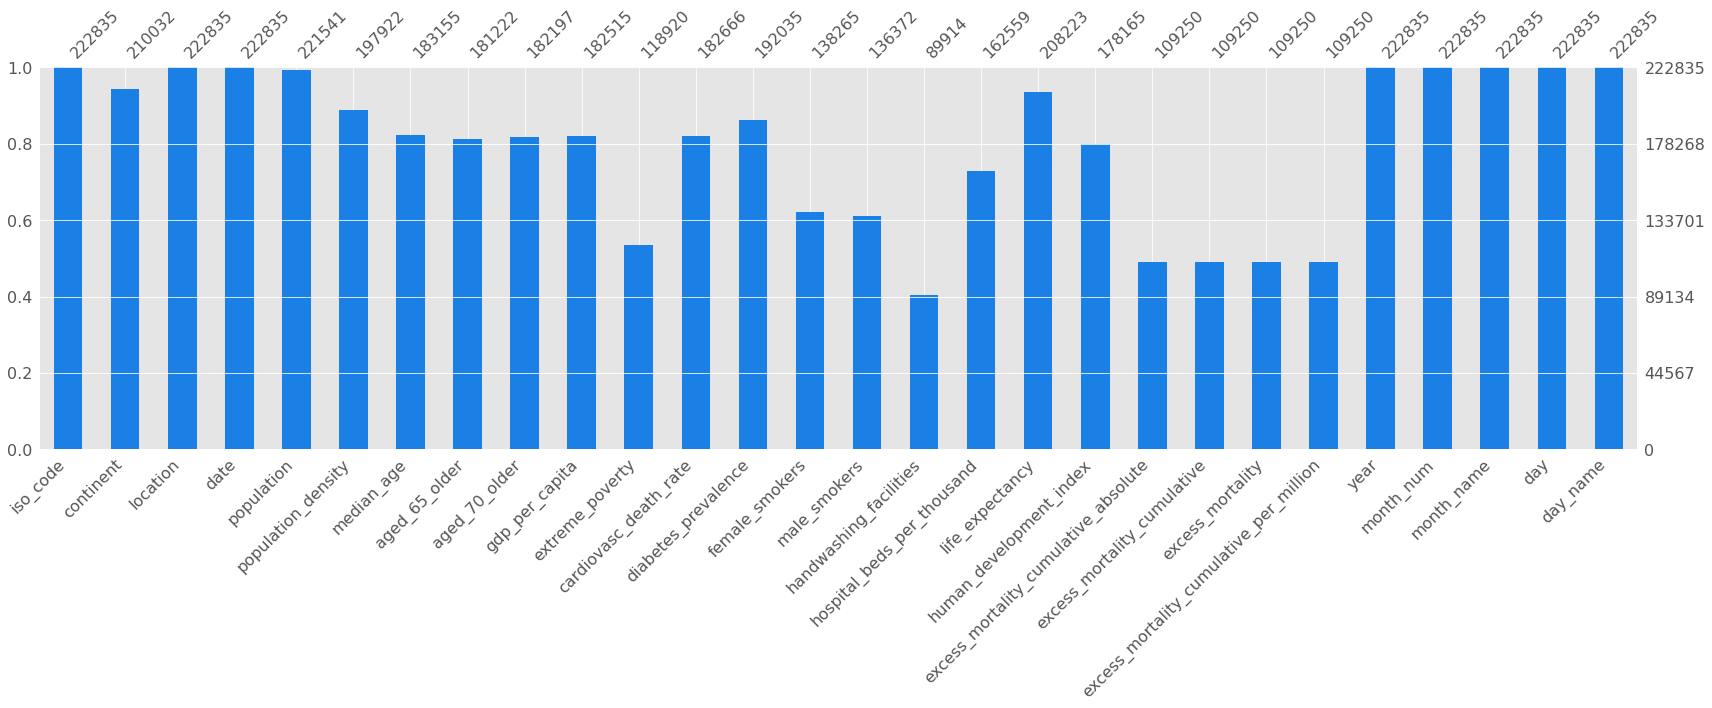

In [91]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

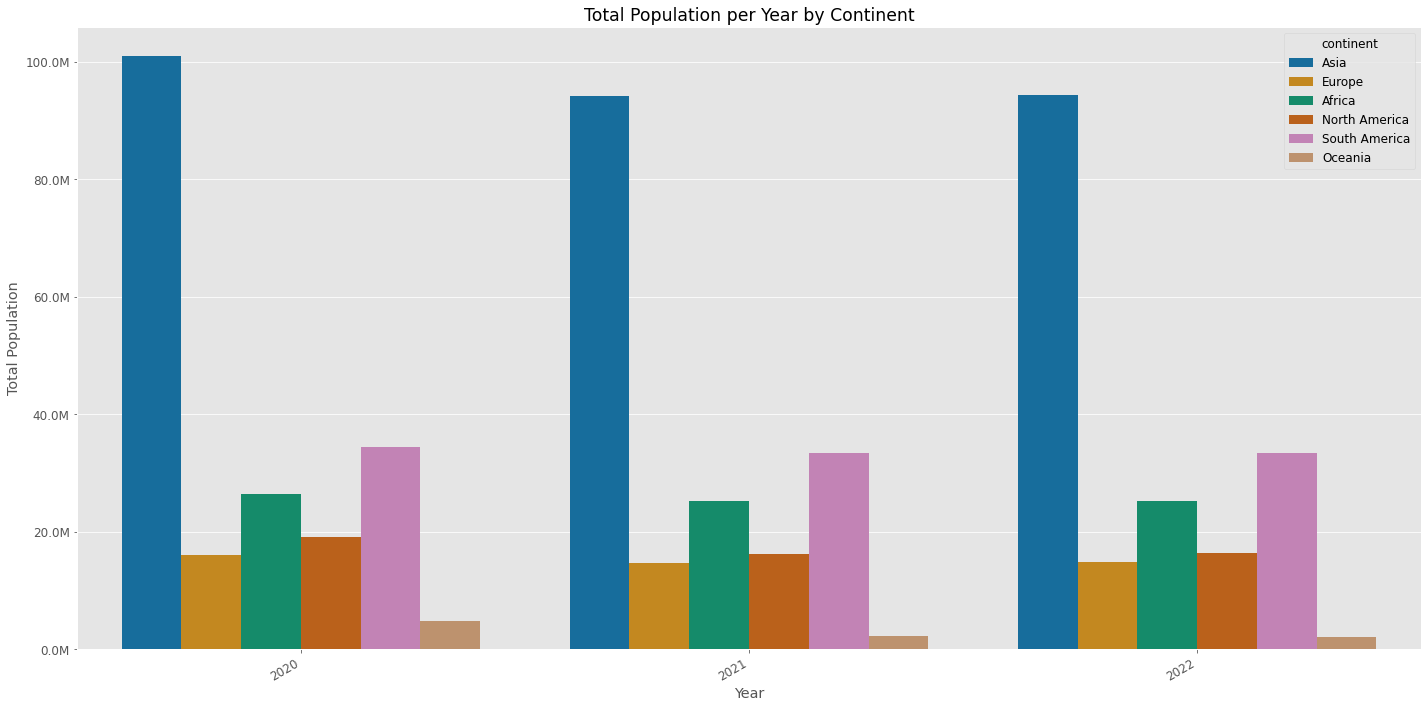

In [92]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', palette='colorblind',
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

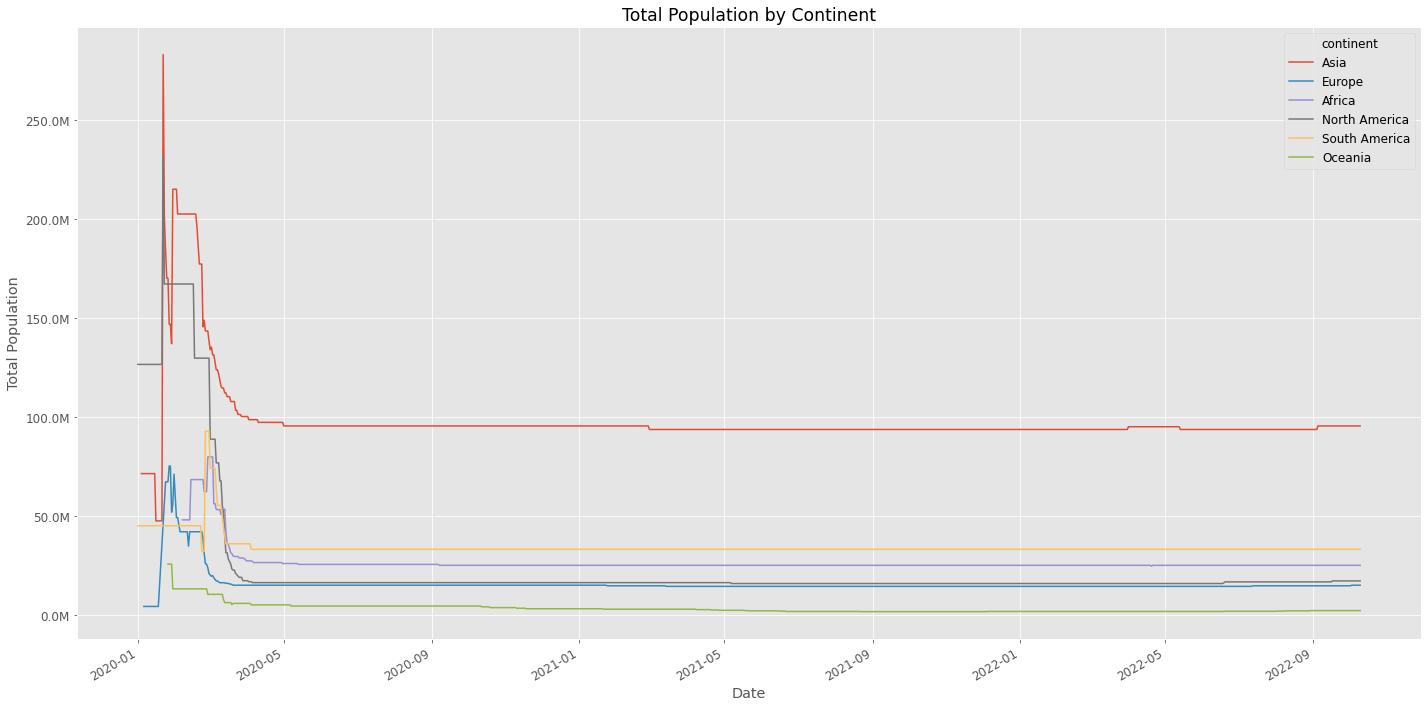

In [93]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

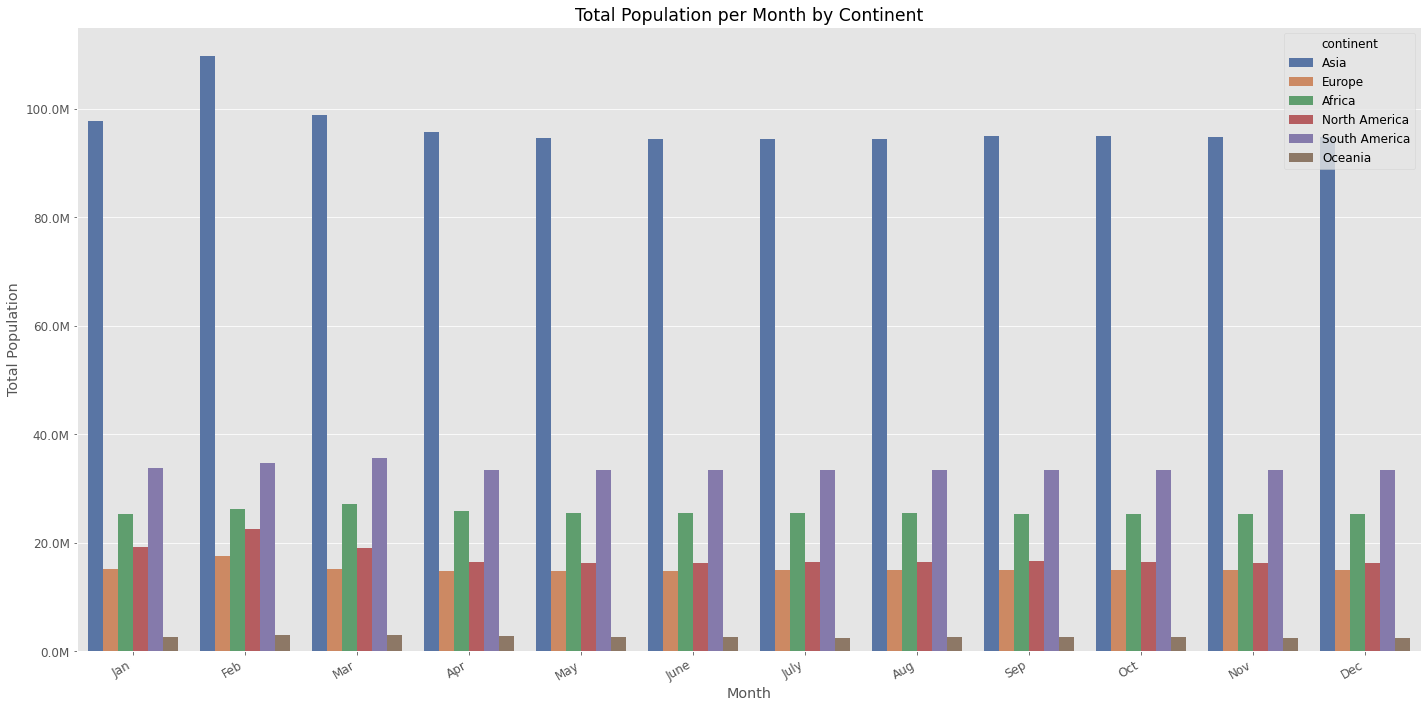

In [94]:
plot_bar(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='deep',
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

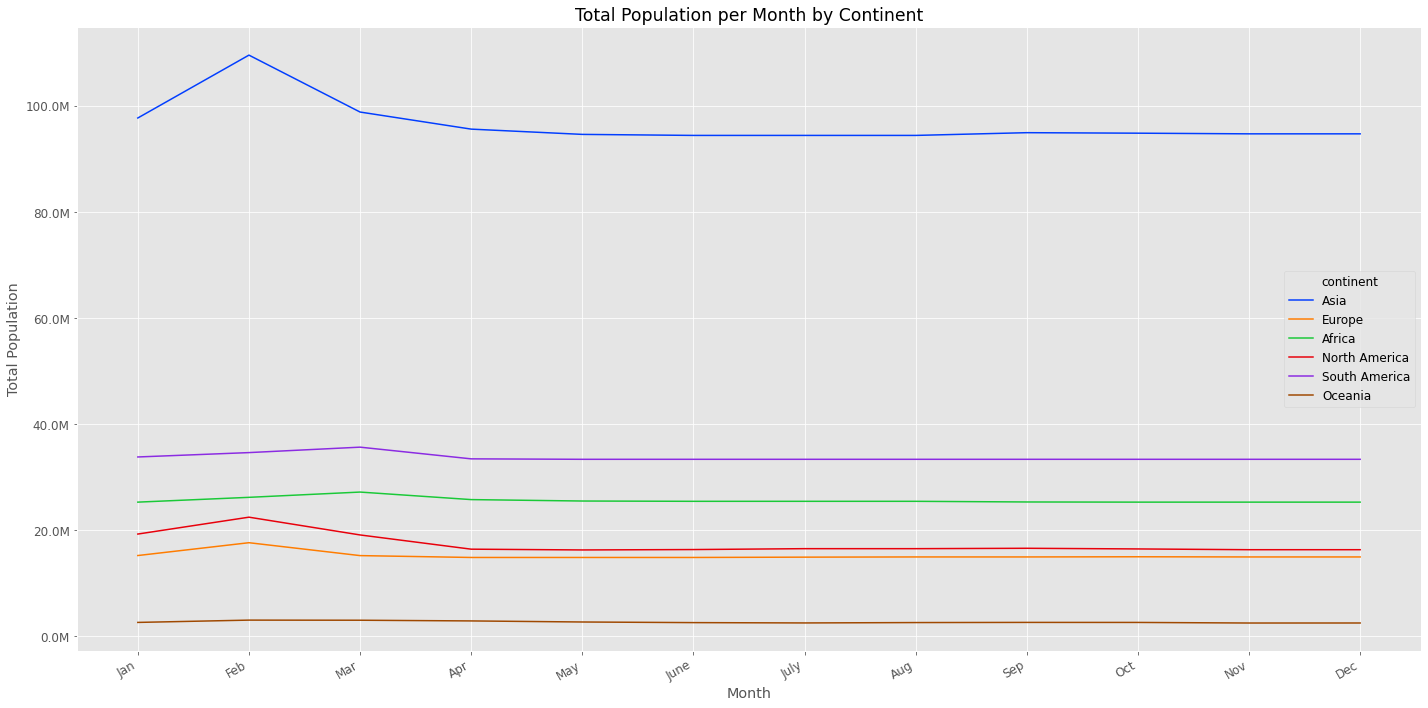

In [95]:
plot_line(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='bright', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

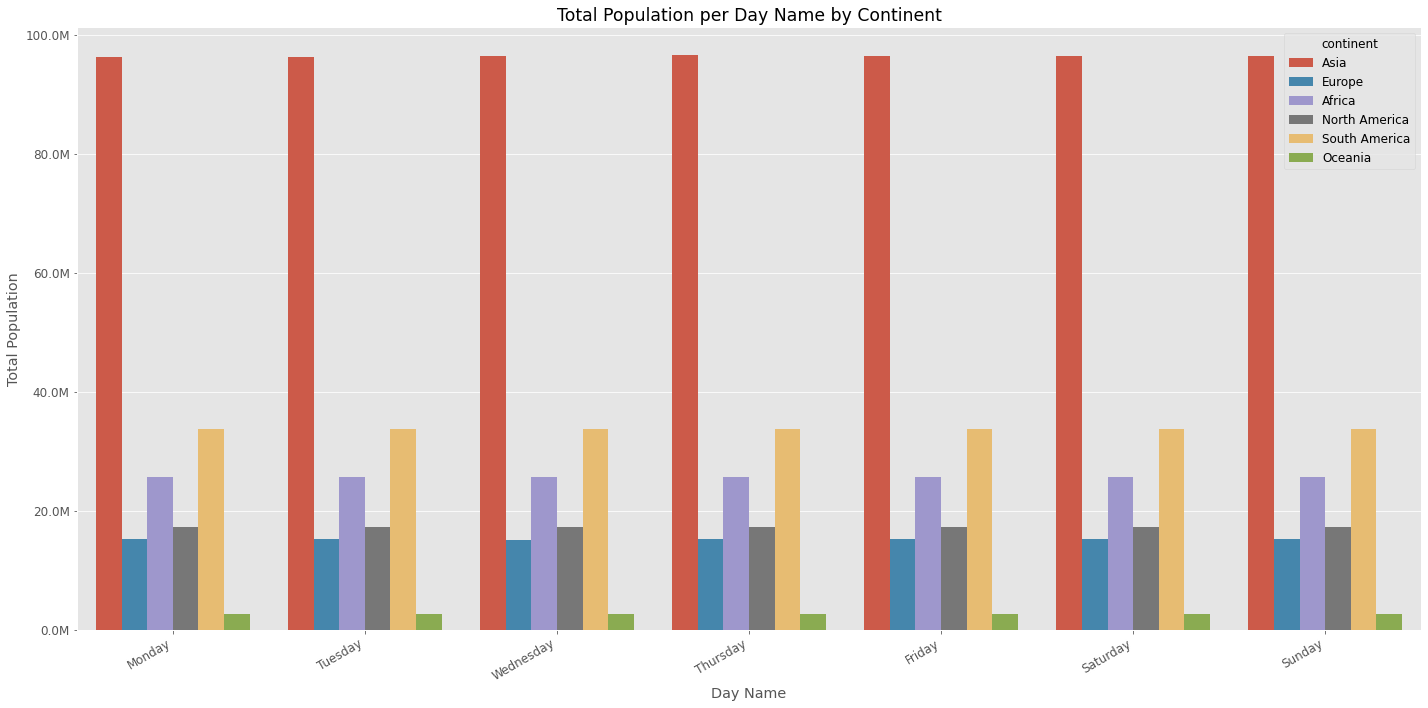

In [96]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

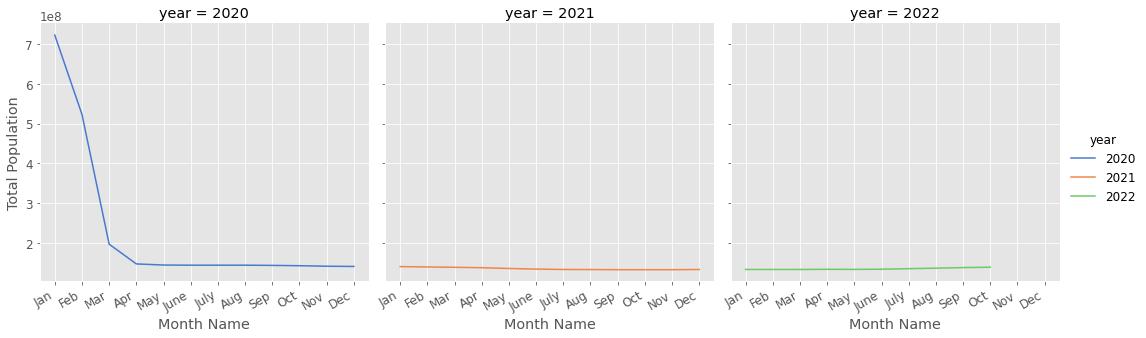

In [97]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

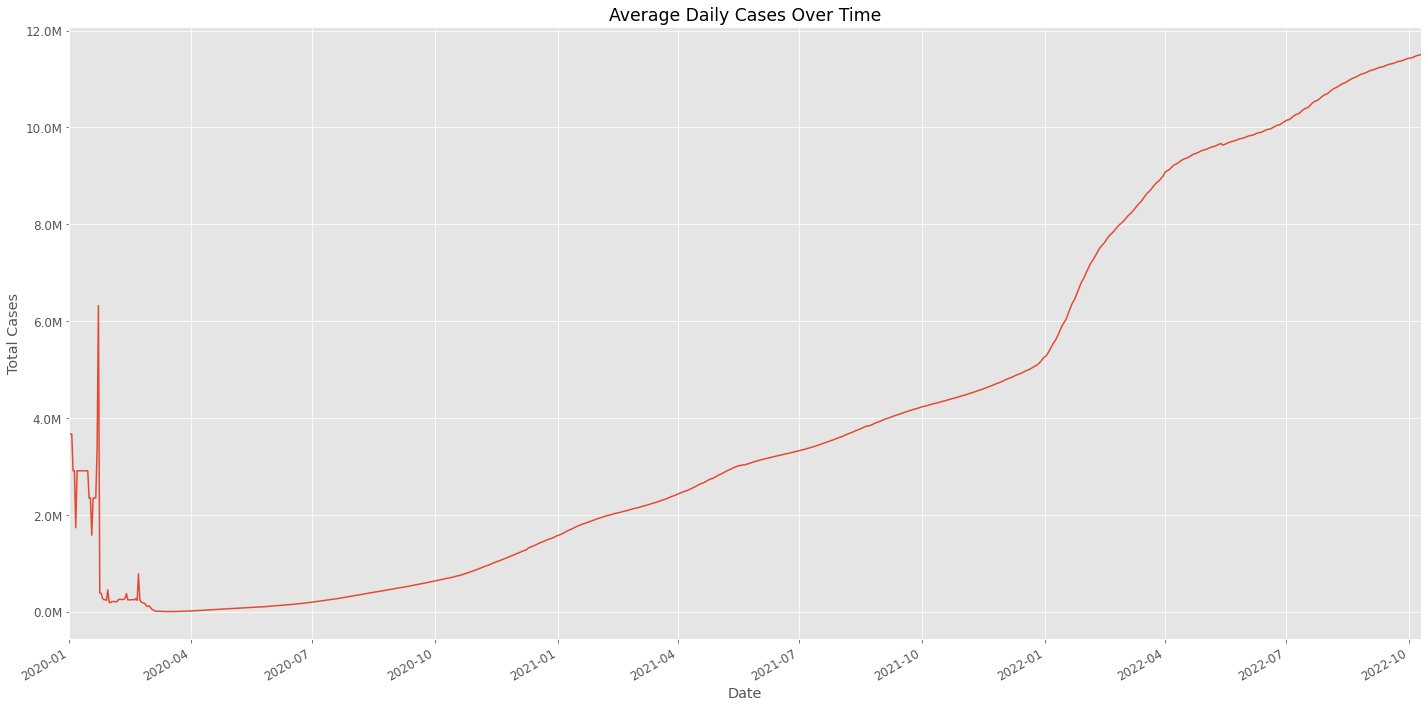

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

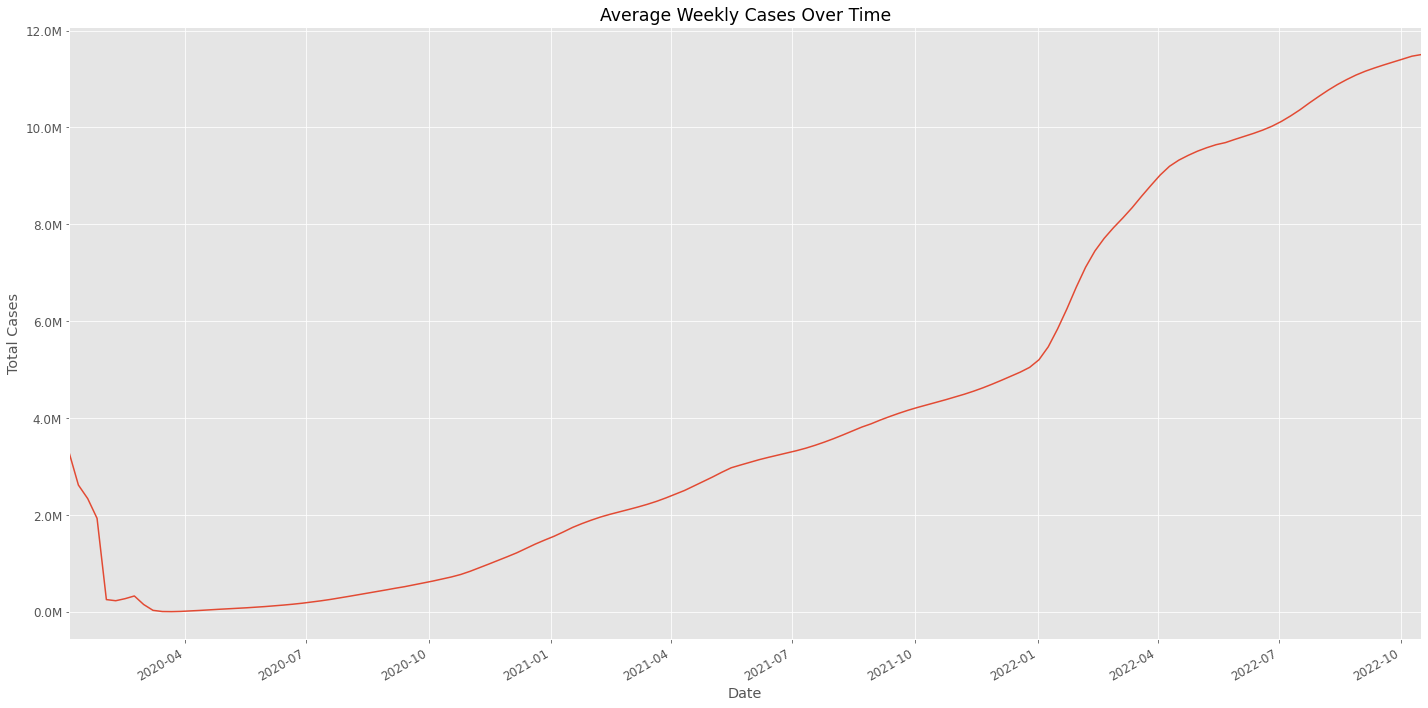

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

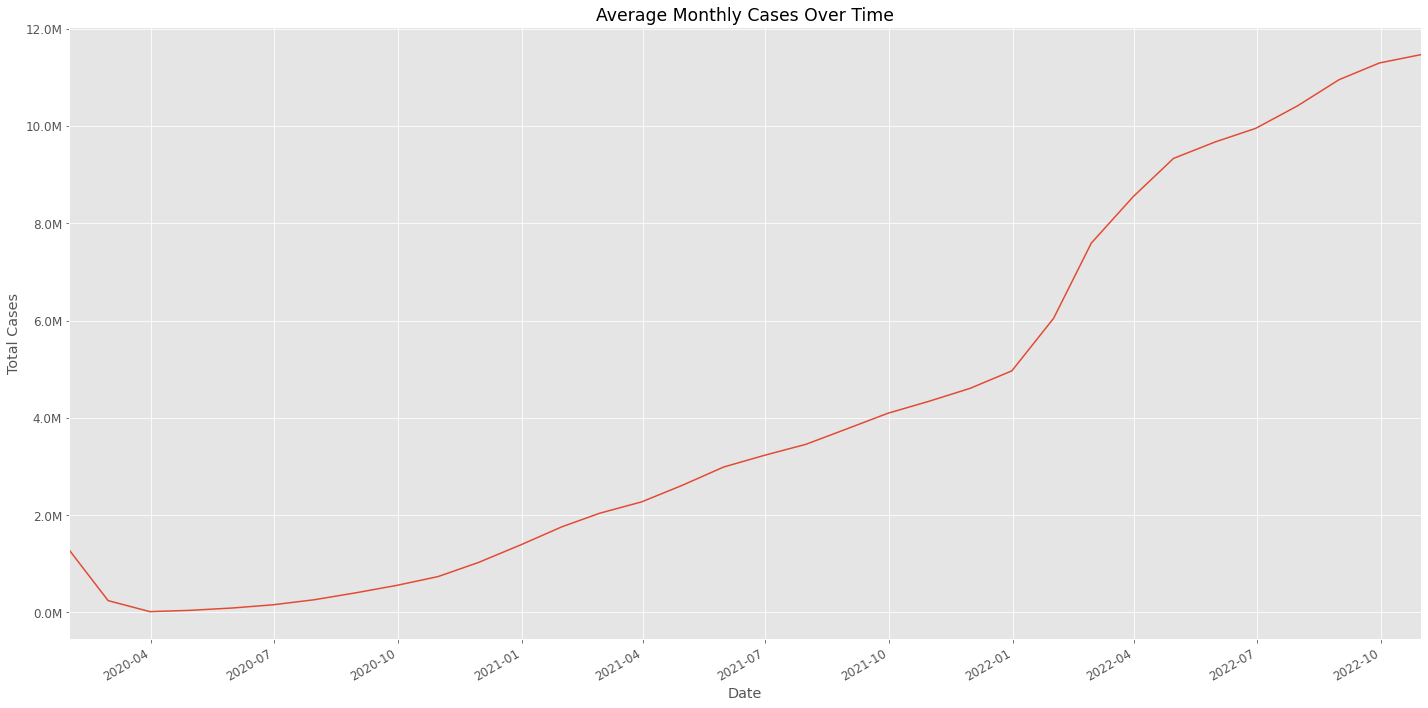

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

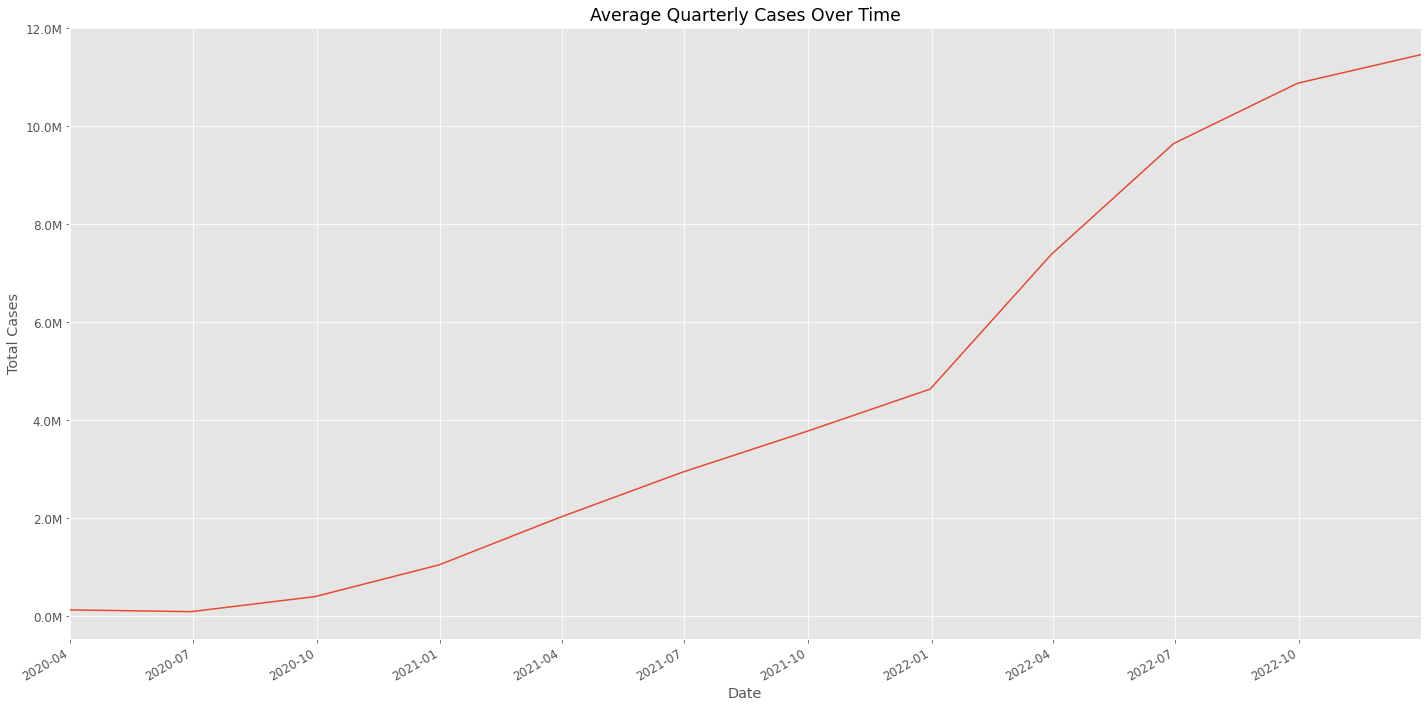

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

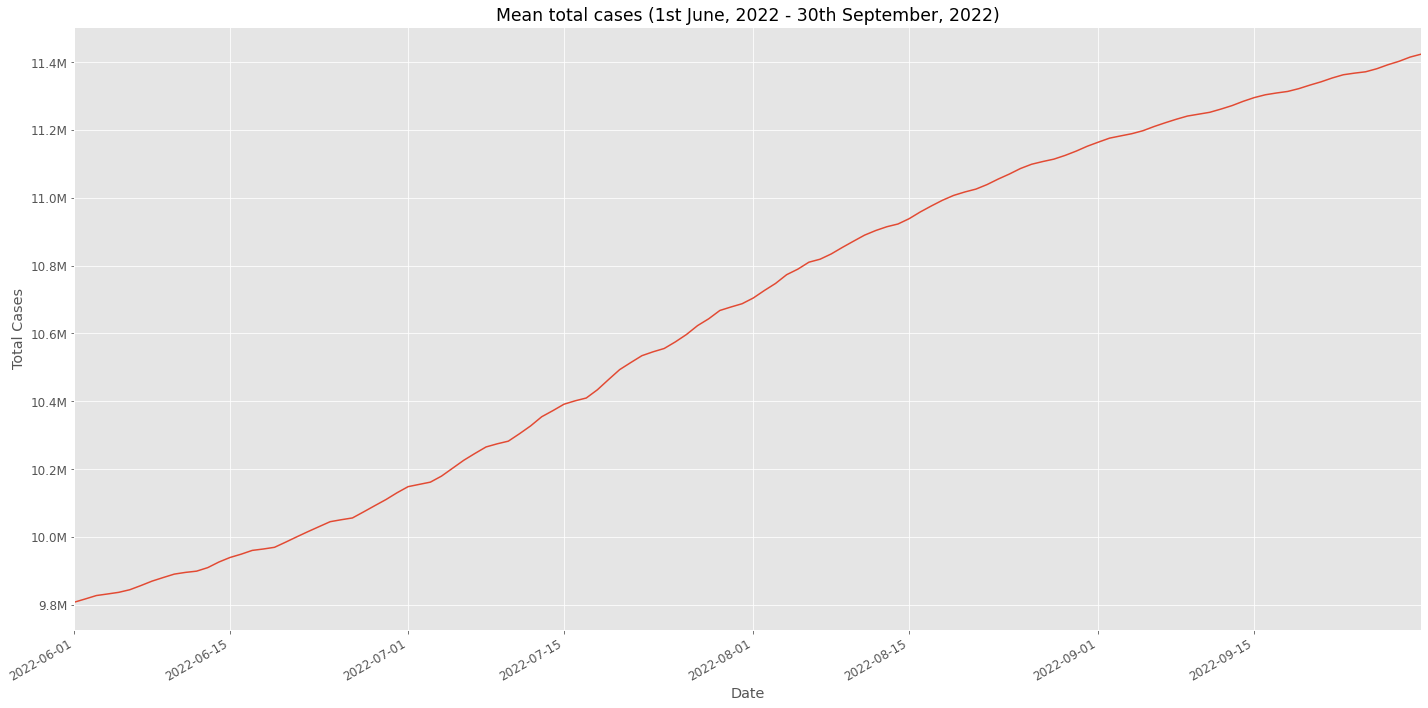

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-06-01', after='2022-09-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st June, 2022 - 30th September, 2022)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

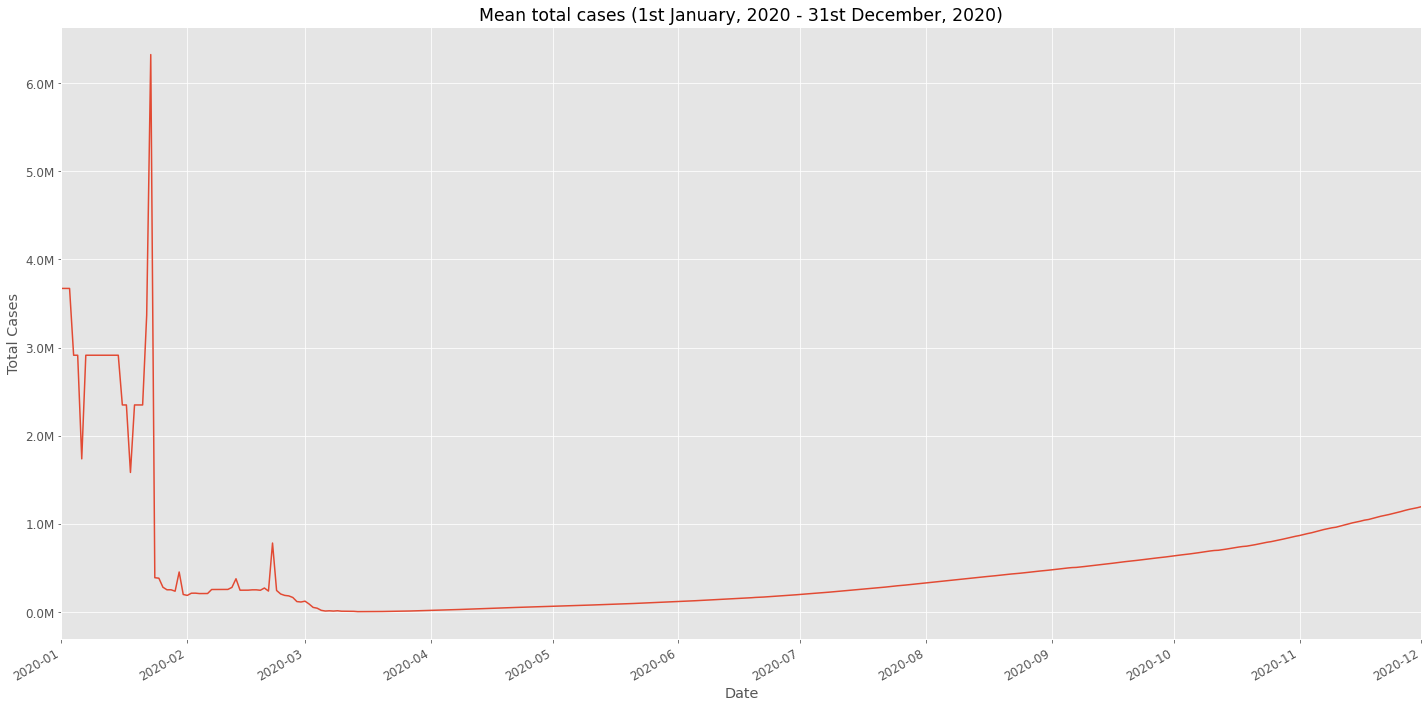

In [103]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

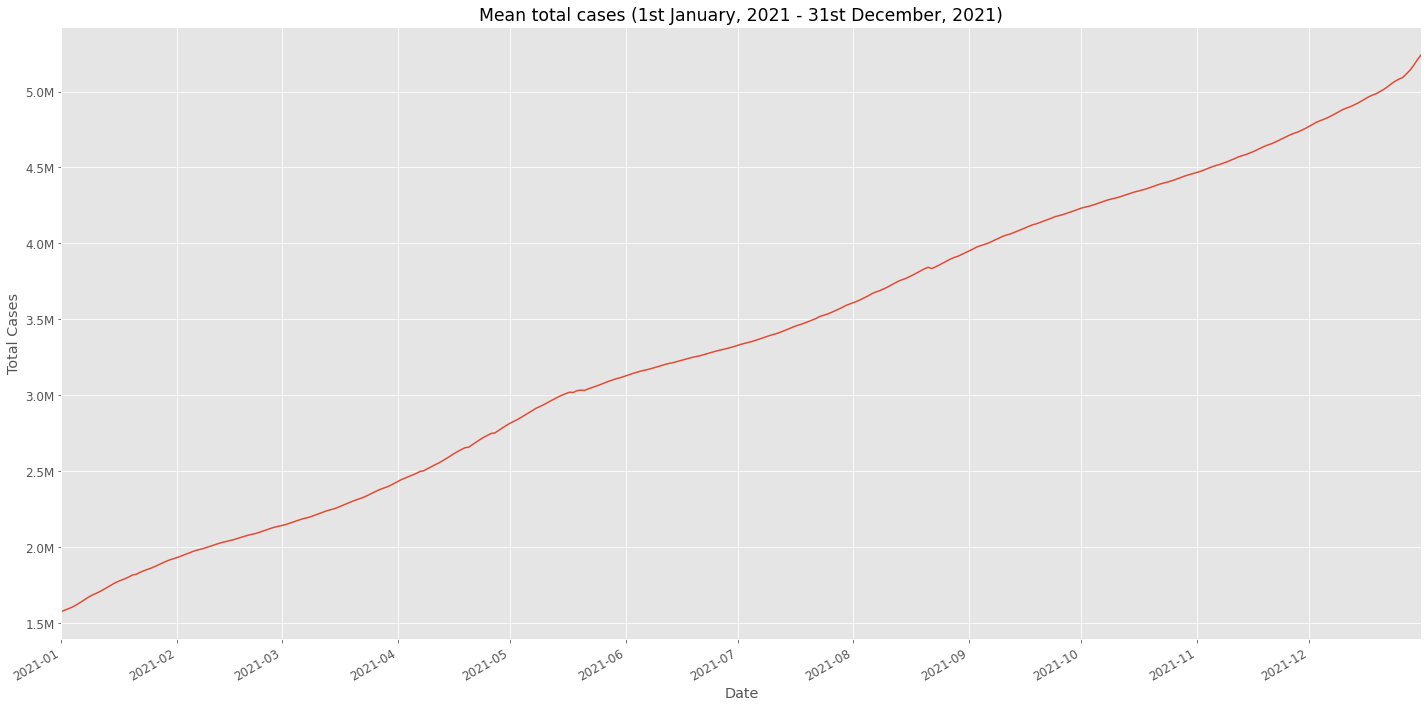

In [104]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

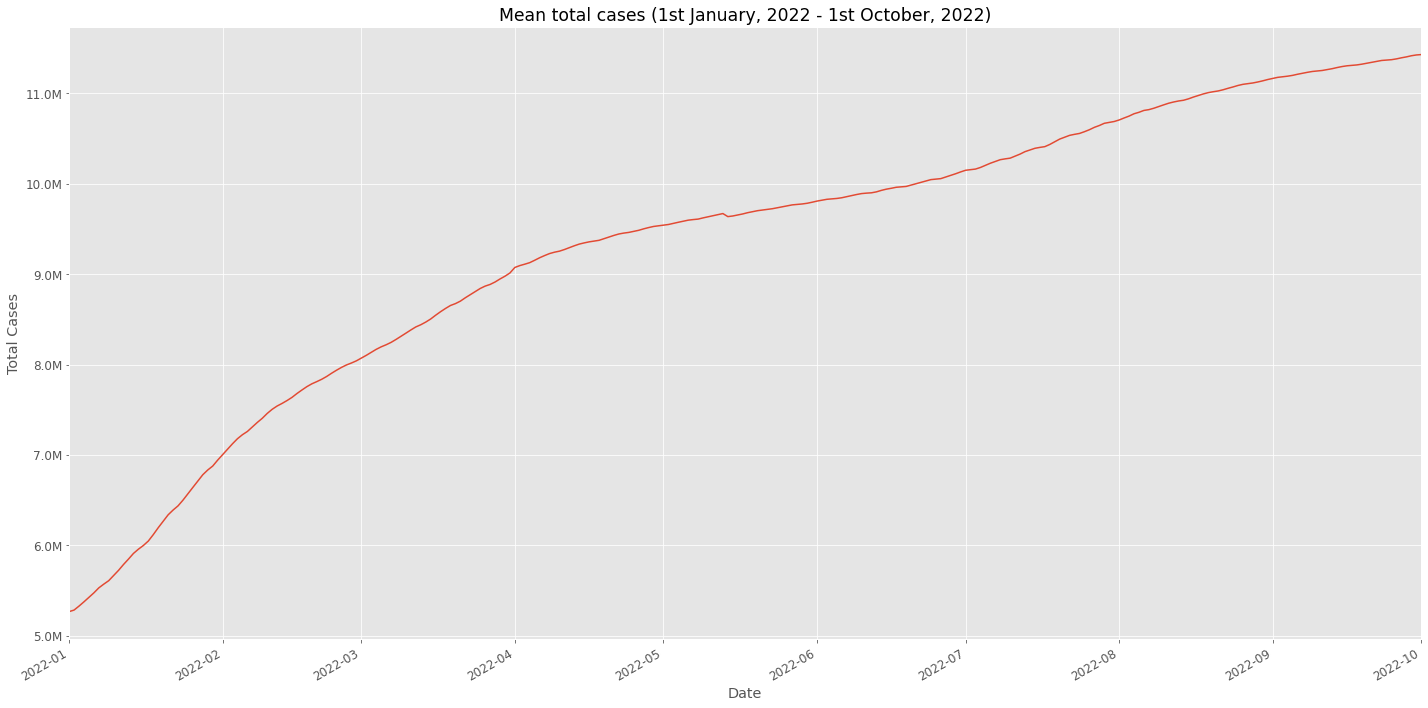

In [105]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-10-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st October, 2022)',
    formatter=format_mill
)